# Hybrid: 1 Sodium 1 Rayleigh 1 Tip-Tilt Height Study
`1S1R1T_height_study1A.ipynb`
: The goal of this jupyter notebook is to produce plots of point-spread function (PSF) metrics and RMS wave-front error (WFE) for the height hybrid LGS trade study. The current plots for each altitude (20, 22, 24, 26, 28 and 30 km) include:

**Science Target Radius Analysis**
* WFE vs. Time:
  * 20 km
  * 22 km
  * 24 km
  * 26 km
  * 28 km
  * 30 km

**On-Axis Height Analysis**
  * Strehl vs. Height
  * FWHM (gaussian) vs. Height
  * EE80 vs. Height
  * WFE vs. Height

**Height Analysis** 
  * Strehl vs. Science Target Radius
  * FWHM (gaussian) vs. Science Target Radius
  * EE80 vs. Science Target Radius
  * WFE vs. Science Target Radius
  * WFE (1000 step burn-in) vs. Science Target Radius

**PSF Plots**
  * IN PROGRESS

## Setup

In [1]:
import os, fnmatch
import importlib
import pylab as plt
import numpy as np
from astropy.io import fits


# Specific packages (may need extra steps to import)
import readbin
from paarti.utils import maos_utils
from paarti import psfs, psf_plots
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from bpeck.hybrid import on_axis_study
from bpeck.mcao import act_study

## Parameters

In [2]:
height = [20, 22, 24, 26, 28, 30] # kilometers
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
wfe_label = ["Total WFE", "Tip-Tilt", "High-Order"]
wfe_color = ["b", "g", "r"]
seed = 1
bandpass = 3
start_index = 1000

%matplotlib inline

## Directory Structure
For this notebook, directories must be structured as the following:
```
1S1R1T_height_study1A/
|--- 1S1R1T_height_study1A.ipynb
|--- 20km/
|--- 22km/
|--- 24km/
|--- 26km/
|--- 28km/
|--- 30km/
```
Where `1S1R1T_height_study1A/` is just a name for the study, this can be changed and it won't affect the note book, `1S1R1T_height_study1A.ipynb` is the name of this notebook. After this notebook has been run, the directory system will look like:
```
1S1R1T_height_study1A/
|--- 1S1R1T_height_study1A.ipynb
|--- 20km/
|--- 22km/
|--- 24km/
|--- 26km/
|--- 28km/
|--- 30km/
|--- on_axis_study_plots/
```
Where `on_axis_study_plots/` is the location where this notebook will drop all PSF and WFE plots.

In [3]:
# Location of plots created 
output_folder = 'on_axis_study_plots/'
os.makedirs(output_folder, exist_ok=True)

### 20km

In [70]:
os.chdir("20km")

In [71]:
# PSF Metrics
mets_20 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_20, y_20, wvl_20, strehl_20, fwhm_g_20, fwhm_e_20, r_ee50_20, r_ee80_20 = mets_20

# WFE
wfe_20 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_20, clos_mean_nm_20, open_xx_mean_nm_20, clos_xx_mean_nm_20 = wfe_20

wfe_burn_20 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_20, burn_clos_mean_nm_20, burn_open_xx_mean_nm_20, burn_clos_xx_mean_nm_20 = wfe_burn_20

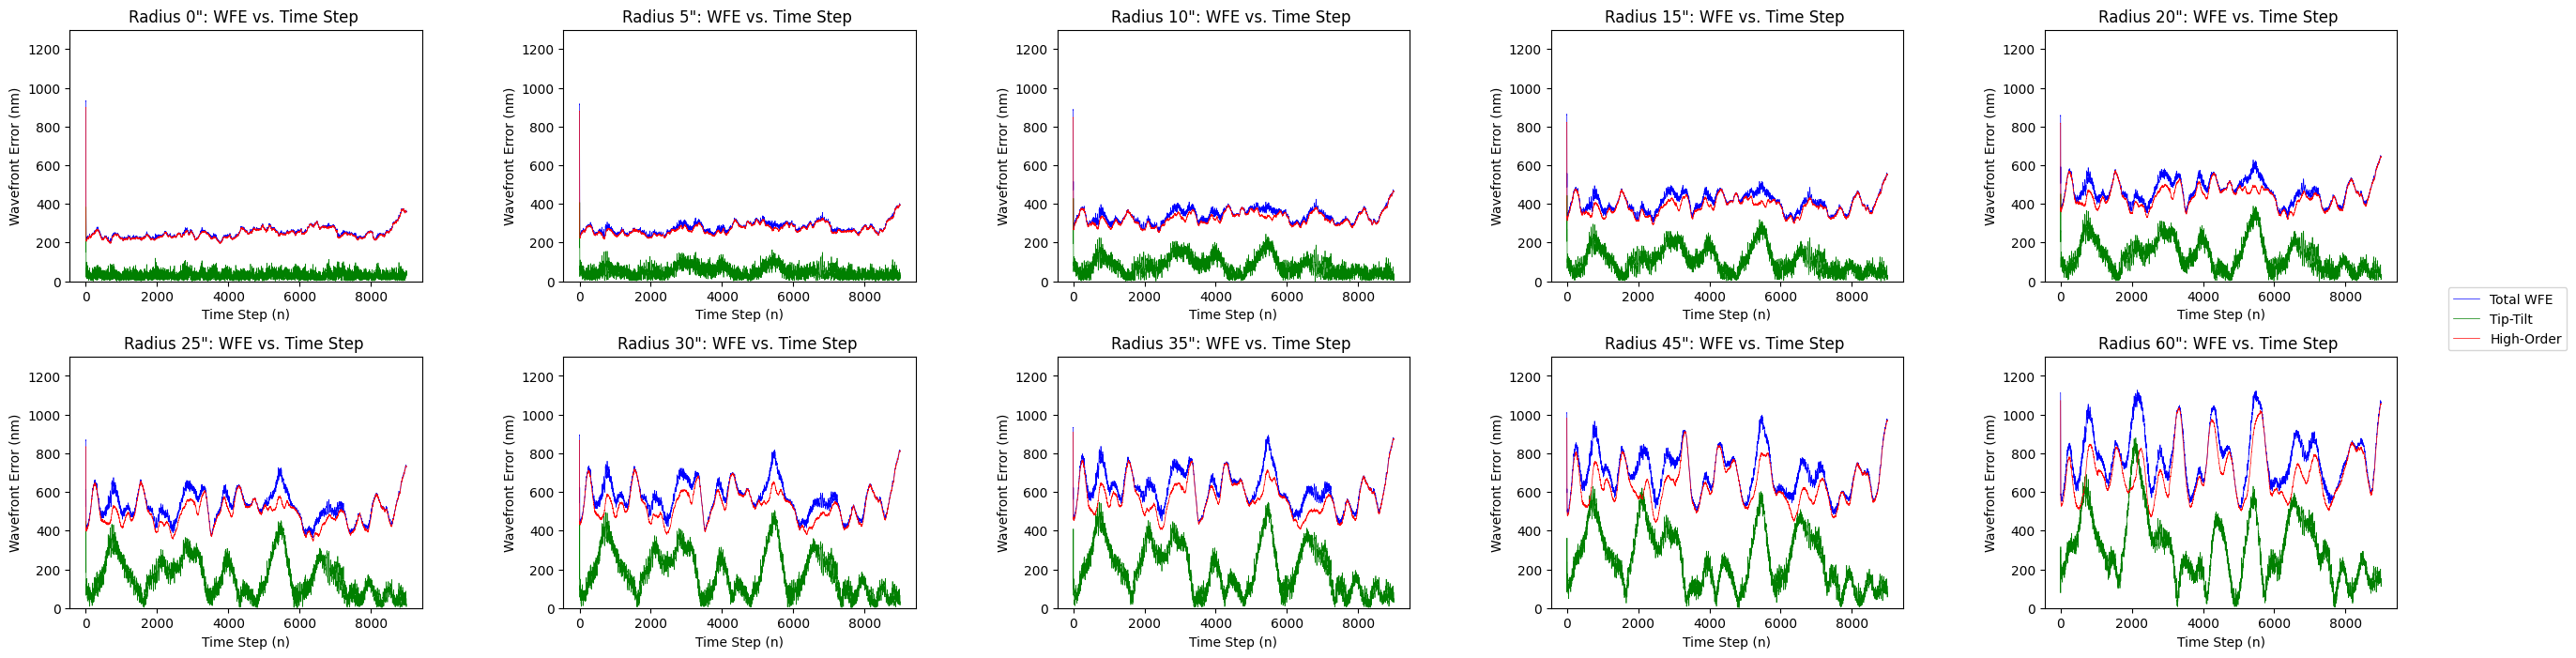

In [62]:
n_wvl_20 = x_20.shape[1]
colors_20 = plt.cm.jet(np.linspace(0, 1, n_wvl_20))

results_xx_file_20 = f'extra/Resp_{seed}.bin'
results_xx_20 = readbin.readbin(results_xx_file_20)
n_psf_20 = clos_xx_mean_nm_20.shape[0]

fig, ax = plt.subplots(2, n_psf_20//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_20):
    row_index_20 = i // (n_psf_20 // 2) 
    col_index_20 = (i % (n_psf_20 // 2))
    clos_psf_results_20 = results_xx_20[3][i]

    for j in range(clos_psf_results_20.shape[1]):
        ax[row_index_20,col_index_20].plot(np.sqrt(clos_psf_results_20[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_20,col_index_20].set_ylim(0, 1300)
        ax[row_index_20,col_index_20].set_xlabel('Time Step (n)')
        ax[row_index_20,col_index_20].set_ylabel('Wavefront Error (nm)')
        ax[row_index_20,col_index_20].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [83]:
print(clos_xx_mean_nm_20[0][0])

251.58551934169822


In [63]:
os.chdir ("..")

### 22km

In [33]:
os.chdir("22km") 

In [34]:
# PSF Metrics
mets_22 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_22, y_22, wvl_22, strehl_22, fwhm_g_22, fwhm_e_22, r_ee50_22, r_ee80_22 = mets_22

# WFE
wfe_22 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_22, clos_mean_nm_22, open_xx_mean_nm_22, clos_xx_mean_nm_22 = wfe_22

wfe_burn_22 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_22, burn_clos_mean_nm_22, burn_open_xx_mean_nm_22, burn_clos_xx_mean_nm_22 = wfe_burn_22

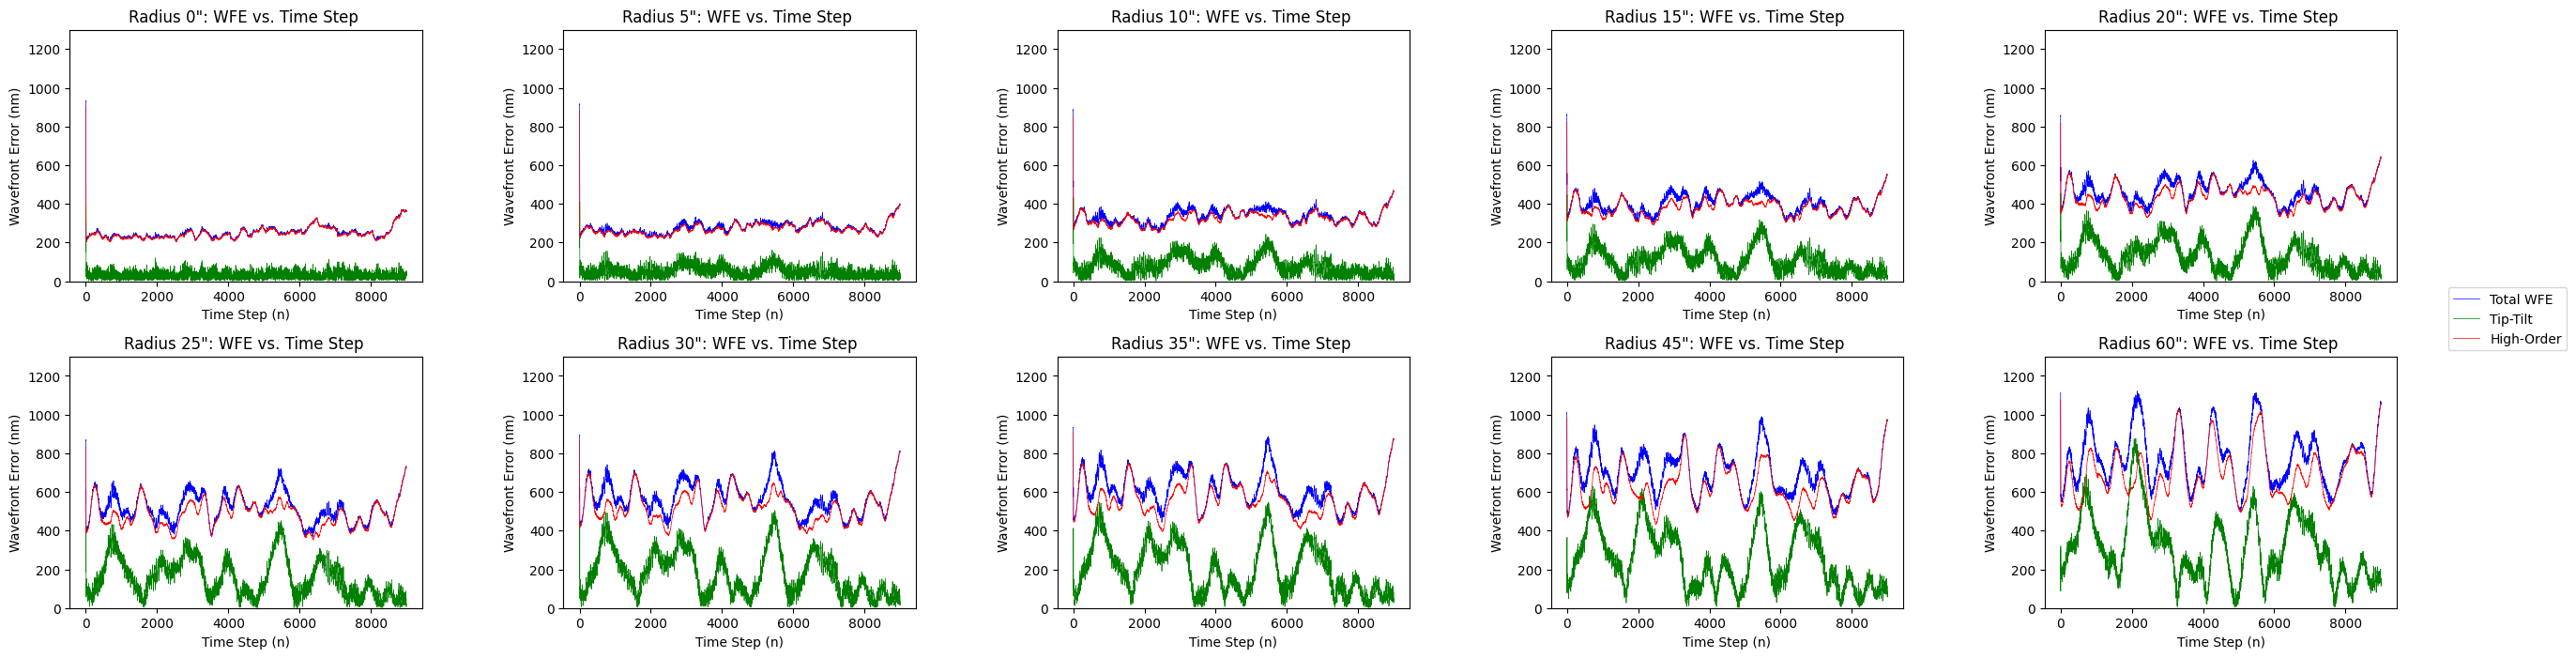

In [56]:
results_xx_file_22 = f'extra/Resp_{seed}.bin'
results_xx_22 = readbin.readbin(results_xx_file_22)
n_psf_22 = clos_xx_mean_nm_22.shape[0]

fig, ax = plt.subplots(2, n_psf_22//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_22):
    row_index_22 = i // (n_psf_22 // 2) 
    col_index_22 = (i % (n_psf_22 // 2))
    clos_psf_results_22 = results_xx_22[3][i]

    for j in range(clos_psf_results_22.shape[1]):
        ax[row_index_22,col_index_22].plot(np.sqrt(clos_psf_results_22[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_22,col_index_22].set_ylim(0, 1300)
        ax[row_index_22,col_index_22].set_xlabel('Time Step (n)')
        ax[row_index_22,col_index_22].set_ylabel('Wavefront Error (nm)')
        ax[row_index_22,col_index_22].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [41]:
os.chdir ("..")

### 24km

In [42]:
os.chdir("24km") 

In [43]:
# PSF Metrics
mets_24 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_24, y_24, wvl_24, strehl_24, fwhm_g_24, fwhm_e_24, r_ee50_24, r_ee80_24 = mets_24

# WFE
wfe_24 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_24, clos_mean_nm_24, open_xx_mean_nm_24, clos_xx_mean_nm_24 = wfe_24

wfe_burn_24 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_24, burn_clos_mean_nm_24, burn_open_xx_mean_nm_24, burn_clos_xx_mean_nm_24 = wfe_burn_24

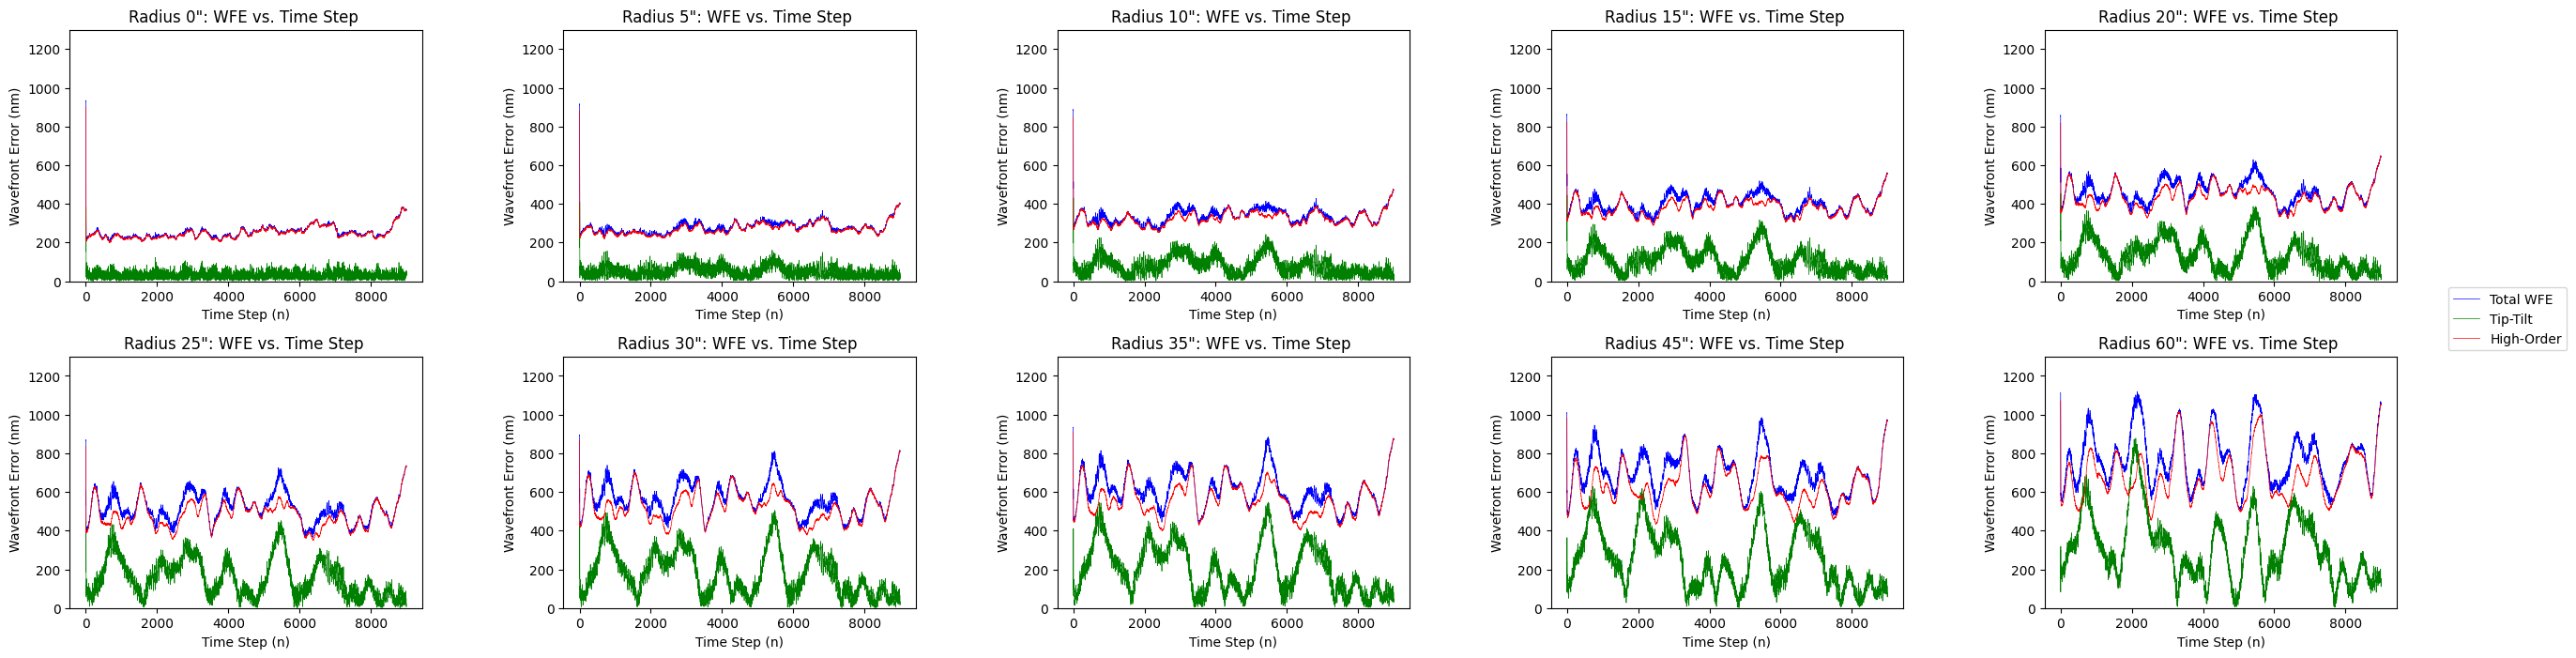

In [44]:
results_xx_file_24 = f'extra/Resp_{seed}.bin'
results_xx_24 = readbin.readbin(results_xx_file_24)
n_psf_24 = clos_xx_mean_nm_24.shape[0]

fig, ax = plt.subplots(2, n_psf_24//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_22):
    row_index_24 = i // (n_psf_24 // 2) 
    col_index_24 = (i % (n_psf_24 // 2))
    clos_psf_results_24 = results_xx_24[3][i]

    for j in range(clos_psf_results_24.shape[1]):
        ax[row_index_24,col_index_24].plot(np.sqrt(clos_psf_results_24[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_24,col_index_24].set_ylim(0, 1300)
        ax[row_index_24,col_index_24].set_xlabel('Time Step (n)')
        ax[row_index_24,col_index_24].set_ylabel('Wavefront Error (nm)')
        ax[row_index_24,col_index_24].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [45]:
os.chdir ("..")

### 26km

In [46]:
os.chdir ("26km")

In [47]:
# PSF Metrics
mets_26 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_26, y_26, wvl_26, strehl_26, fwhm_g_26, fwhm_e_26, r_ee50_26, r_ee80_26 = mets_26

# WFE
wfe_26 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_26, clos_mean_nm_26, open_xx_mean_nm_26, clos_xx_mean_nm_26 = wfe_26

wfe_burn_26 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_26, burn_clos_mean_nm_26, burn_open_xx_mean_nm_26, burn_clos_xx_mean_nm_26 = wfe_burn_26

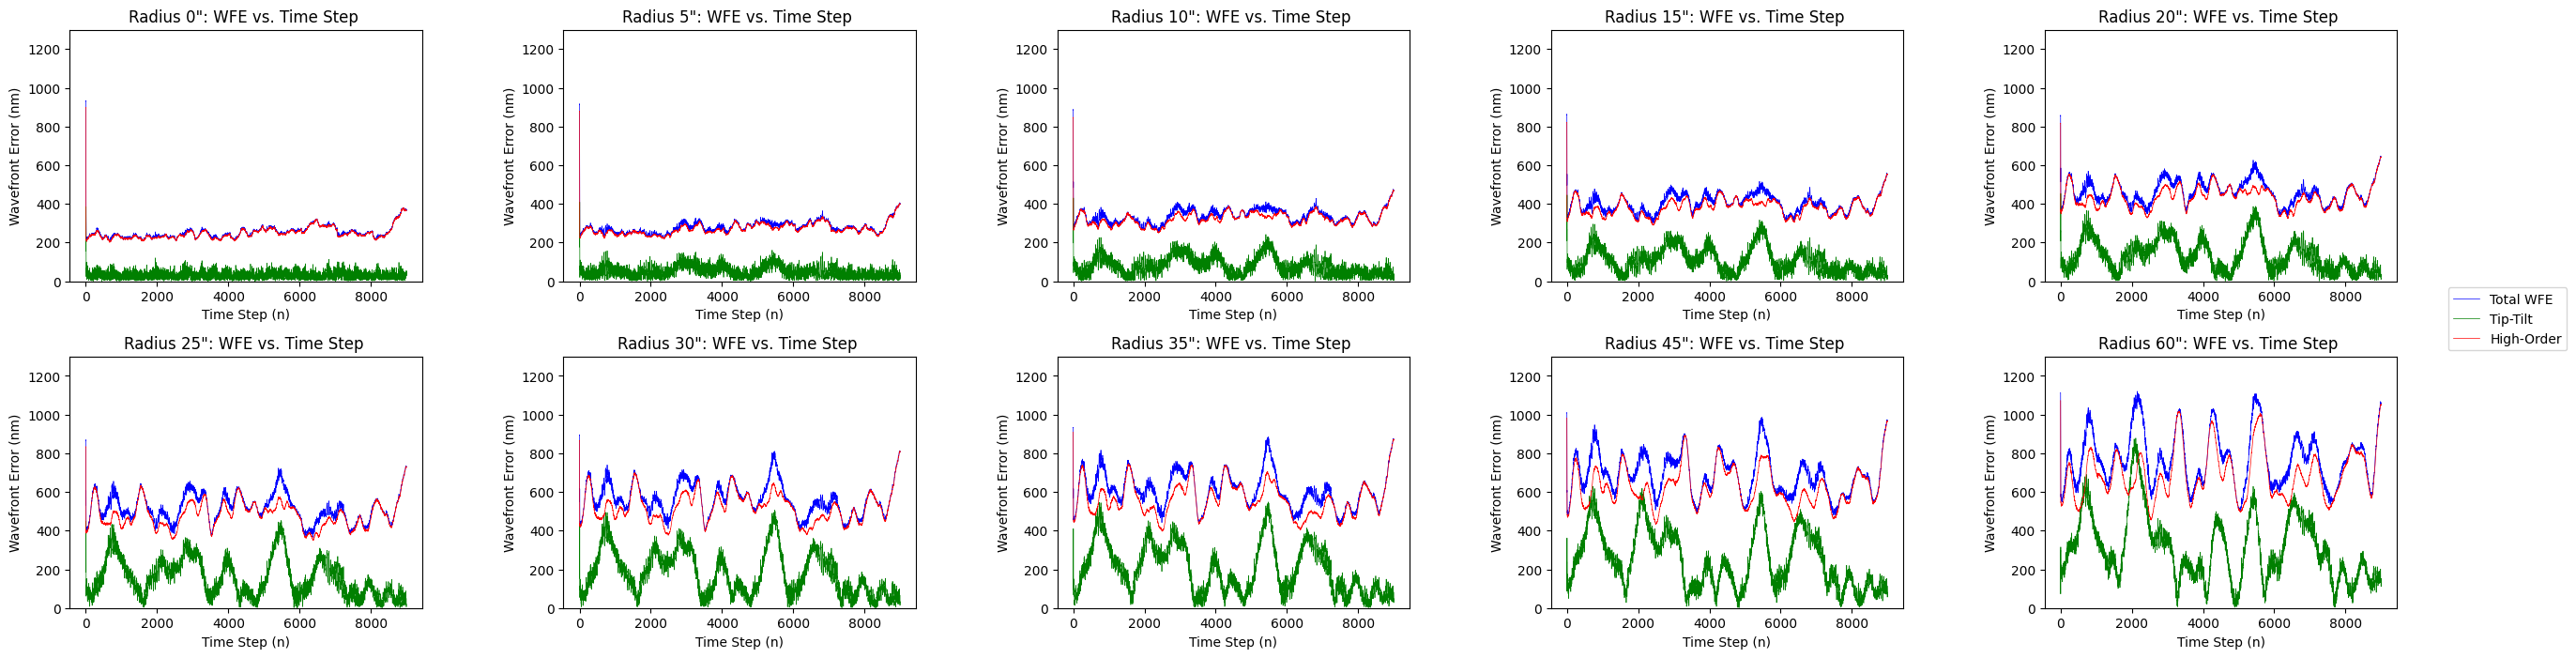

In [48]:
results_xx_file_26 = f'extra/Resp_{seed}.bin'
results_xx_26 = readbin.readbin(results_xx_file_26)
n_psf_26 = clos_xx_mean_nm_26.shape[0]

fig, ax = plt.subplots(2, n_psf_26//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_26):
    row_index_26 = i // (n_psf_26 // 2) 
    col_index_26 = (i % (n_psf_26 // 2))
    clos_psf_results_26 = results_xx_26[3][i]

    for j in range(clos_psf_results_26.shape[1]):
        ax[row_index_26,col_index_26].plot(np.sqrt(clos_psf_results_26[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_26,col_index_26].set_ylim(0, 1300)
        ax[row_index_26,col_index_26].set_xlabel('Time Step (n)')
        ax[row_index_26,col_index_26].set_ylabel('Wavefront Error (nm)')
        ax[row_index_26,col_index_26].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [49]:
os.chdir ("..")

### 28km

In [50]:
os.chdir ("28km")

In [51]:
# PSF Metrics
mets_28 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_28, y_28, wvl_28, strehl_28, fwhm_g_28, fwhm_e_28, r_ee50_28, r_ee80_28 = mets_28

# WFE
wfe_28 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_28, clos_mean_nm_28, open_xx_mean_nm_28, clos_xx_mean_nm_28 = wfe_28

wfe_burn_28 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_28, burn_clos_mean_nm_28, burn_open_xx_mean_nm_28, burn_clos_xx_mean_nm_28 = wfe_burn_28

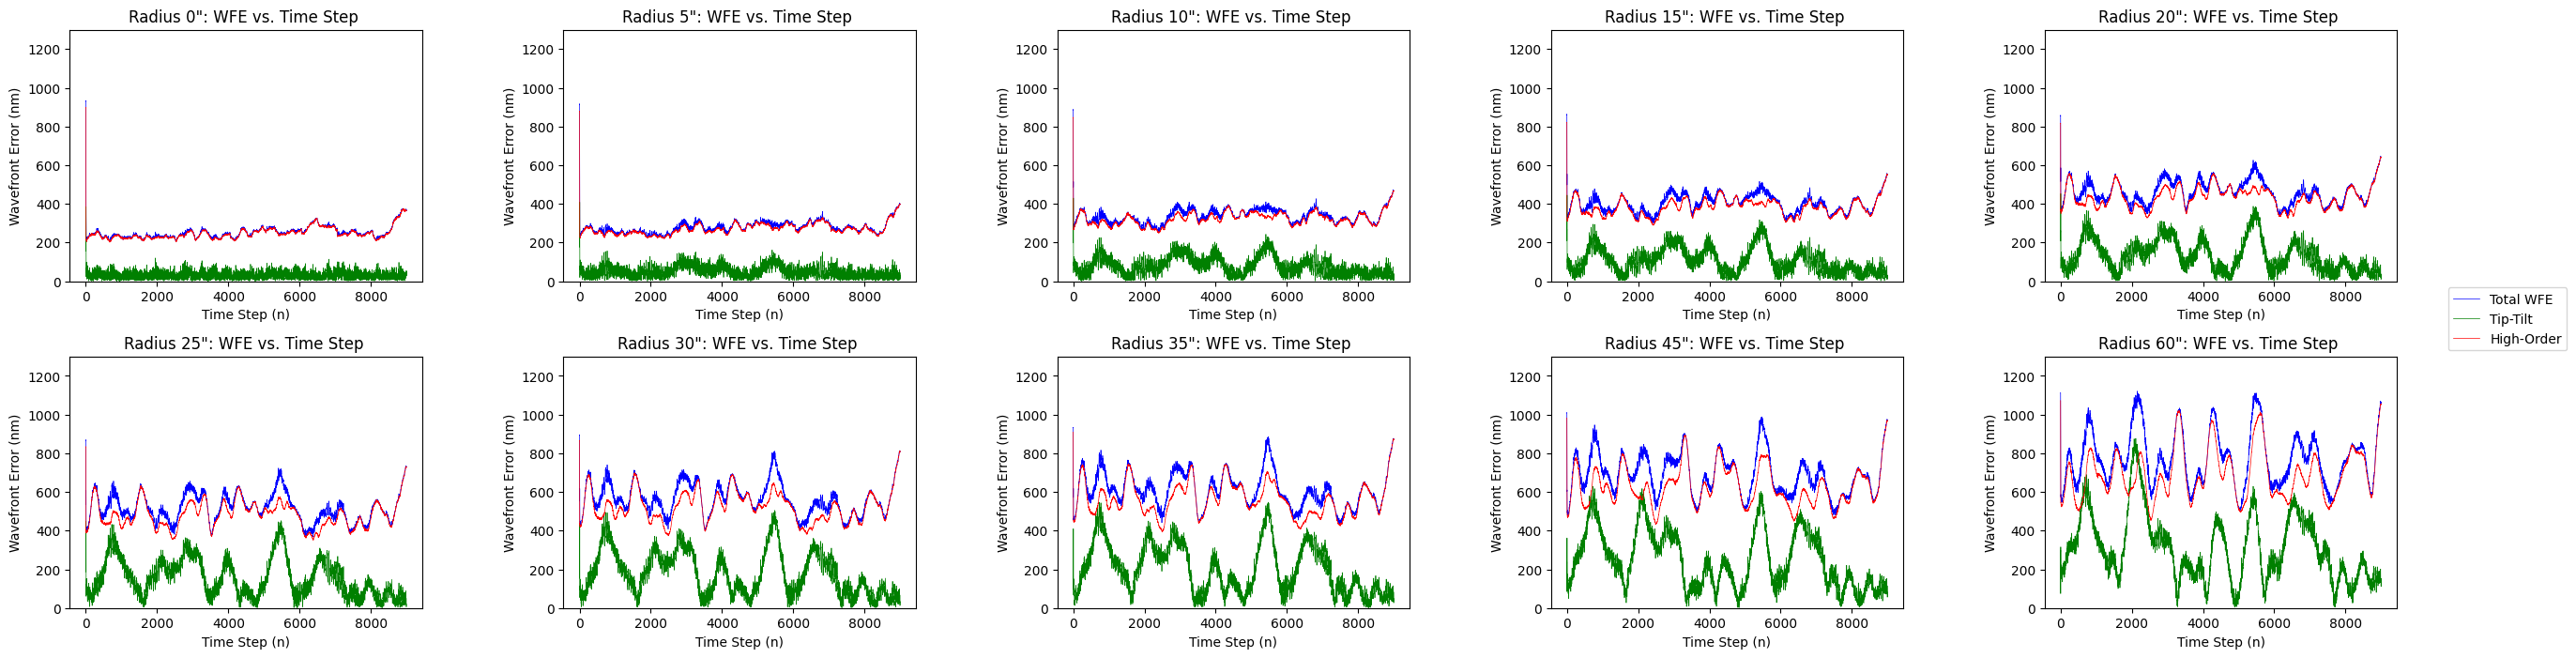

In [52]:
results_xx_file_28 = f'extra/Resp_{seed}.bin'
results_xx_28 = readbin.readbin(results_xx_file_28)
n_psf_28 = clos_xx_mean_nm_28.shape[0]

fig, ax = plt.subplots(2, n_psf_28//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_28):
    row_index_28 = i // (n_psf_28 // 2) 
    col_index_28 = (i % (n_psf_28 // 2))
    clos_psf_results_28 = results_xx_28[3][i]

    for j in range(clos_psf_results_28.shape[1]):
        ax[row_index_28,col_index_28].plot(np.sqrt(clos_psf_results_28[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_28,col_index_28].set_ylim(0, 1300)
        ax[row_index_28,col_index_28].set_xlabel('Time Step (n)')
        ax[row_index_28,col_index_28].set_ylabel('Wavefront Error (nm)')
        ax[row_index_28,col_index_28].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [53]:
os.chdir ("..")

### 30km

In [54]:
os.chdir ("30km")

In [55]:
# PSF Metrics
mets_30 = on_axis_study.get_psf_metrics_over_field(seed=seed)
x_30, y_30, wvl_30, strehl_30, fwhm_g_30, fwhm_e_30, r_ee50_30, r_ee80_30 = mets_30

# WFE
wfe_30 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_30, clos_mean_nm_30, open_xx_mean_nm_30, clos_xx_mean_nm_30 = wfe_30

wfe_burn_30 = on_axis_study.get__burn_wfe_metrics_over_field(start_index=start_index)
burn_open_mean_nm_30, burn_clos_mean_nm_30, burn_open_xx_mean_nm_30, burn_clos_xx_mean_nm_30 = wfe_burn_30

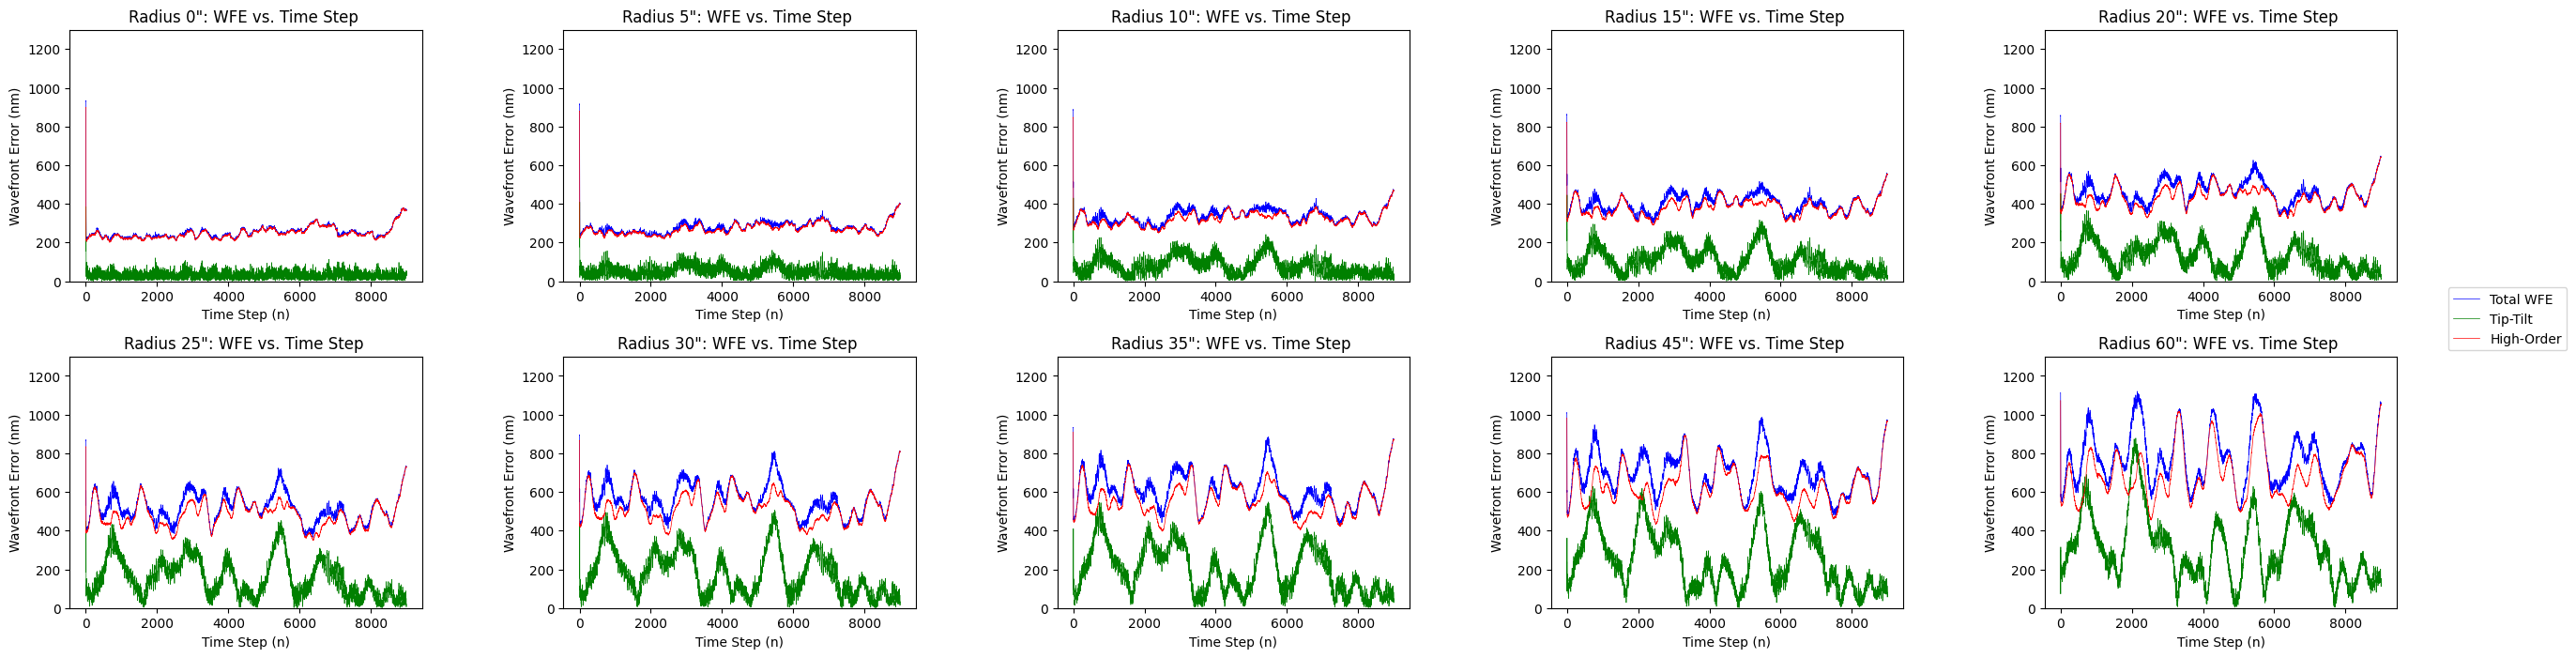

In [57]:
results_xx_file_30 = f'extra/Resp_{seed}.bin'
results_xx_30 = readbin.readbin(results_xx_file_30)
n_psf_30 = clos_xx_mean_nm_30.shape[0]

fig, ax = plt.subplots(2, n_psf_30//2, figsize=(32,8), gridspec_kw={'hspace':0.3, 'wspace':0.4})

for i in range(n_psf_30):
    row_index_30 = i // (n_psf_30 // 2) 
    col_index_30 = (i % (n_psf_30 // 2))
    clos_psf_results_30 = results_xx_20[3][i]

    for j in range(clos_psf_results_30.shape[1]):
        ax[row_index_30,col_index_30].plot(np.sqrt(clos_psf_results_30[:,j])*1.0e9, color=wfe_color[j], label=wfe_label[j], linewidth=0.5)
        ax[row_index_30,col_index_30].set_ylim(0, 1300)
        ax[row_index_30,col_index_30].set_xlabel('Time Step (n)')
        ax[row_index_30,col_index_30].set_ylabel('Wavefront Error (nm)')
        ax[row_index_30,col_index_30].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))
plt.show()

In [58]:
os.chdir ("..")

## Results

### Strehl vs. Height

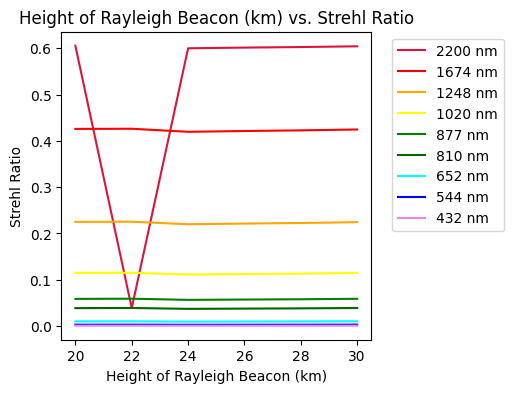

In [67]:
strehl_432 = np.array([strehl_20[0][0], strehl_22[0][0], strehl_24[0][0], strehl_26[0][0], strehl_28[0][0], strehl_30[0][0]])
strehl_544 = np.array([strehl_20[0][1], strehl_22[0][1], strehl_24[0][1], strehl_26[0][1], strehl_28[0][1], strehl_30[0][1]])
strehl_652 = np.array([strehl_20[0][2], strehl_22[0][2], strehl_24[0][2], strehl_26[0][2], strehl_28[0][2], strehl_30[0][2]])
strehl_810 = np.array([strehl_20[0][3], strehl_22[0][3], strehl_24[0][3], strehl_26[0][3], strehl_28[0][3], strehl_30[0][3]])
strehl_877 = np.array([strehl_20[0][4], strehl_22[0][4], strehl_24[0][4], strehl_26[0][4], strehl_28[0][4], strehl_30[0][4]])
strehl_1020 = np.array([strehl_20[0][5], strehl_22[0][5], strehl_24[0][5], strehl_26[0][5], strehl_28[0][5], strehl_30[0][5]])
strehl_1248 = np.array([strehl_20[0][6], strehl_22[0][6], strehl_24[0][6], strehl_26[0][6], strehl_28[0][6], strehl_30[0][6]])
strehl_1674 = np.array([strehl_20[0][7], strehl_22[0][7], strehl_24[0][7], strehl_26[0][7], strehl_28[0][7], strehl_30[0][7]])
strehl_2200 = np.array([strehl_20[0][8], strehl_22[8][8], strehl_24[0][8], strehl_26[0][8], strehl_28[0][8], strehl_30[0][8]])

plt.figure(figsize=(4,4))
plt.plot(height, strehl_2200, color = "crimson", label = "2200 nm")
plt.plot(height, strehl_1674, color = "red", label = "1674 nm")
plt.plot(height, strehl_1248, color = "orange", label = "1248 nm")
plt.plot(height, strehl_1020, color = "yellow", label = "1020 nm")
plt.plot(height, strehl_877, color = "green", label = "877 nm")
plt.plot(height, strehl_810, color = "darkgreen", label = "810 nm")
plt.plot(height, strehl_652, color = "cyan", label = "652 nm")
plt.plot(height, strehl_544, color = "blue", label = "544 nm")
plt.plot(height, strehl_432, color = "violet", label = "432 nm")
plt.title("Height of Rayleigh Beacon (km) vs. Strehl Ratio")
plt.xlabel("Height of Rayleigh Beacon (km)")
plt.ylabel("Strehl Ratio")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.show()

### Height vs. Gaussian FWHM

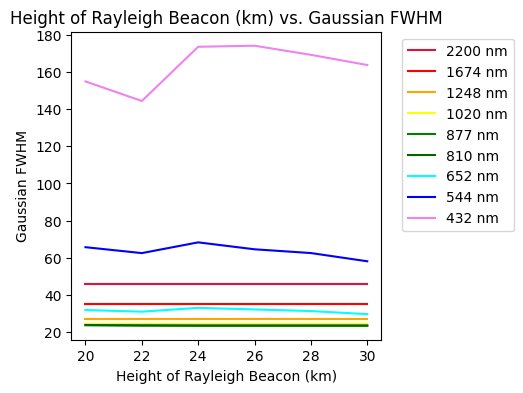

In [65]:
fwhm_g_432 = np.array([fwhm_g_20[0][0], fwhm_g_22[0][0], fwhm_g_24[0][0], fwhm_g_26[0][0], fwhm_g_28[0][0], fwhm_g_30[0][0]])
fwhm_g_544 = np.array([fwhm_g_20[0][1], fwhm_g_22[0][1], fwhm_g_24[0][1], fwhm_g_26[0][1], fwhm_g_28[0][1], fwhm_g_30[0][1]])
fwhm_g_652 = np.array([fwhm_g_20[0][2], fwhm_g_22[0][2], fwhm_g_24[0][2], fwhm_g_26[0][2], fwhm_g_28[0][2], fwhm_g_30[0][2]])
fwhm_g_810 = np.array([fwhm_g_20[0][3], fwhm_g_22[0][3], fwhm_g_24[0][3], fwhm_g_26[0][3], fwhm_g_28[0][3], fwhm_g_30[0][3]])
fwhm_g_877 = np.array([fwhm_g_20[0][4], fwhm_g_22[0][4], fwhm_g_24[0][4], fwhm_g_26[0][4], fwhm_g_28[0][4], fwhm_g_30[0][4]])
fwhm_g_1020 = np.array([fwhm_g_20[0][5], fwhm_g_22[0][5], fwhm_g_24[0][5], fwhm_g_26[0][5], fwhm_g_28[0][5], fwhm_g_30[0][5]])
fwhm_g_1248 = np.array([fwhm_g_20[0][6], fwhm_g_22[0][6], fwhm_g_24[0][6], fwhm_g_26[0][6], fwhm_g_28[0][6], fwhm_g_30[0][6]])
fwhm_g_1674 = np.array([fwhm_g_20[0][7], fwhm_g_22[0][7], fwhm_g_24[0][7], fwhm_g_26[0][7], fwhm_g_28[0][7], fwhm_g_30[0][7]])
fwhm_g_2200 = np.array([fwhm_g_20[0][8], fwhm_g_22[0][8], fwhm_g_24[0][8], fwhm_g_26[0][8], fwhm_g_28[0][8], fwhm_g_30[0][8]])

plt.figure(figsize=(4,4))
plt.plot(height, fwhm_g_2200, color = "crimson", label = "2200 nm")
plt.plot(height, fwhm_g_1674, color = "red", label = "1674 nm")
plt.plot(height, fwhm_g_1248, color = "orange", label = "1248 nm")
plt.plot(height, fwhm_g_1020, color = "yellow", label = "1020 nm")
plt.plot(height, fwhm_g_877, color = "green", label = "877 nm")
plt.plot(height, fwhm_g_810, color = "darkgreen", label = "810 nm")
plt.plot(height, fwhm_g_652, color = "cyan", label = "652 nm")
plt.plot(height, fwhm_g_544, color = "blue", label = "544 nm")
plt.plot(height, fwhm_g_432, color = "violet", label = "432 nm")
plt.title("Height of Rayleigh Beacon (km) vs. Gaussian FWHM")
plt.xlabel("Height of Rayleigh Beacon (km)")
plt.ylabel("Gaussian FWHM")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.show()

### Encircled Energy 80% vs. Height

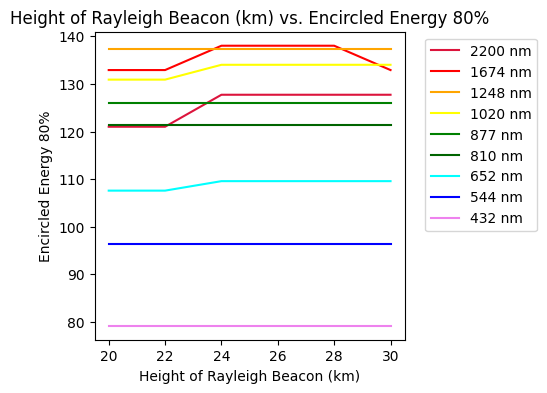

In [69]:
r_ee80_432 = np.array([r_ee80_20[0][0], r_ee80_22[0][0], r_ee80_24[0][0], r_ee80_26[0][0], r_ee80_28[0][0], r_ee80_30[0][0]])
r_ee80_544 = np.array([r_ee80_20[0][1], r_ee80_22[0][1], r_ee80_24[0][1], r_ee80_26[0][1], r_ee80_28[0][1], r_ee80_30[0][1]])
r_ee80_652 = np.array([r_ee80_20[0][2], r_ee80_22[0][2], r_ee80_24[0][2], r_ee80_26[0][2], r_ee80_28[0][2], r_ee80_30[0][2]])
r_ee80_810 = np.array([r_ee80_20[0][3], r_ee80_22[0][3], r_ee80_24[0][3], r_ee80_26[0][3], r_ee80_28[0][3], r_ee80_30[0][3]])
r_ee80_877 = np.array([r_ee80_20[0][4], r_ee80_22[0][4], r_ee80_24[0][4], r_ee80_26[0][4], r_ee80_28[0][4], r_ee80_30[0][4]])
r_ee80_1020 = np.array([r_ee80_20[0][5], r_ee80_22[0][5], r_ee80_24[0][5], r_ee80_26[0][5], r_ee80_28[0][5], r_ee80_30[0][5]])
r_ee80_1248 = np.array([r_ee80_20[0][6], r_ee80_22[0][6], r_ee80_24[0][6], r_ee80_26[0][6], r_ee80_28[0][6], r_ee80_30[0][6]])
r_ee80_1674 = np.array([r_ee80_20[0][7], r_ee80_22[0][7], r_ee80_24[0][7], r_ee80_26[0][7], r_ee80_28[0][7], r_ee80_30[0][7]])
r_ee80_2200 = np.array([r_ee80_20[0][8], r_ee80_22[0][8], r_ee80_24[0][8], r_ee80_26[0][8], r_ee80_28[0][8], r_ee80_30[0][8]])

plt.figure(figsize=(4,4))
plt.plot(height, r_ee80_2200, color = "crimson", label = "2200 nm")
plt.plot(height, r_ee80_1674, color = "red", label = "1674 nm")
plt.plot(height, r_ee80_1248, color = "orange", label = "1248 nm")
plt.plot(height, r_ee80_1020, color = "yellow", label = "1020 nm")
plt.plot(height, r_ee80_877, color = "green", label = "877 nm")
plt.plot(height, r_ee80_810, color = "darkgreen", label = "810 nm")
plt.plot(height, r_ee80_652, color = "cyan", label = "652 nm")
plt.plot(height, r_ee80_544, color = "blue", label = "544 nm")
plt.plot(height, r_ee80_432, color = "violet", label = "432 nm")
plt.title("Height of Rayleigh Beacon (km) vs. Encircled Energy 80%")
plt.xlabel("Height of Rayleigh Beacon (km)")
plt.ylabel("Encircled Energy 80%")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right')
plt.show()

### WFE vs. Height

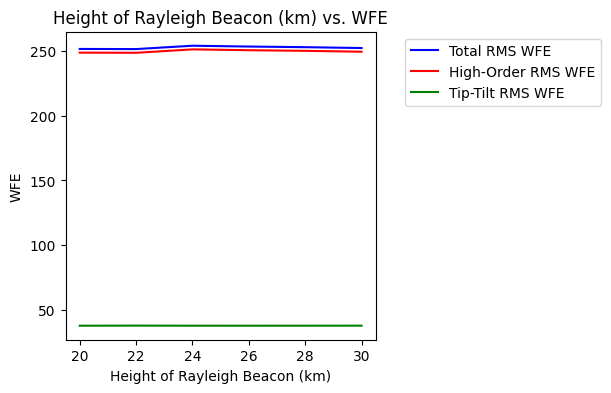

In [75]:
total_wfe = np.array([clos_xx_mean_nm_20[0][0], clos_xx_mean_nm_22[0][0], clos_xx_mean_nm_24[0][0], clos_xx_mean_nm_26[0][0], clos_xx_mean_nm_28[0][0], clos_xx_mean_nm_30[0][0]])
tt_wfe = np.array([clos_xx_mean_nm_20[0][1], clos_xx_mean_nm_22[0][1], clos_xx_mean_nm_24[0][1], clos_xx_mean_nm_26[0][1], clos_xx_mean_nm_28[0][1], clos_xx_mean_nm_30[0][1]])
ho_wfe = np.array([clos_xx_mean_nm_20[0][2], clos_xx_mean_nm_22[0][2], clos_xx_mean_nm_24[0][2], clos_xx_mean_nm_26[0][2], clos_xx_mean_nm_28[0][2], clos_xx_mean_nm_30[0][2]])

plt.figure(figsize=(4,4))
plt.plot(height, total_wfe, color = "blue", label = "Total RMS WFE")
plt.plot(height, ho_wfe, color = "red", label = "High-Order RMS WFE")
plt.plot(height, tt_wfe, color = "green", label = "Tip-Tilt RMS WFE")
plt.title("Height of Rayleigh Beacon (km) vs. WFE")
plt.xlabel("Height of Rayleigh Beacon (km)")
plt.ylabel("WFE")
plt.legend(bbox_to_anchor=(1.75, 1), loc='upper right')
plt.show()

### PSF Radius vs. Strehl

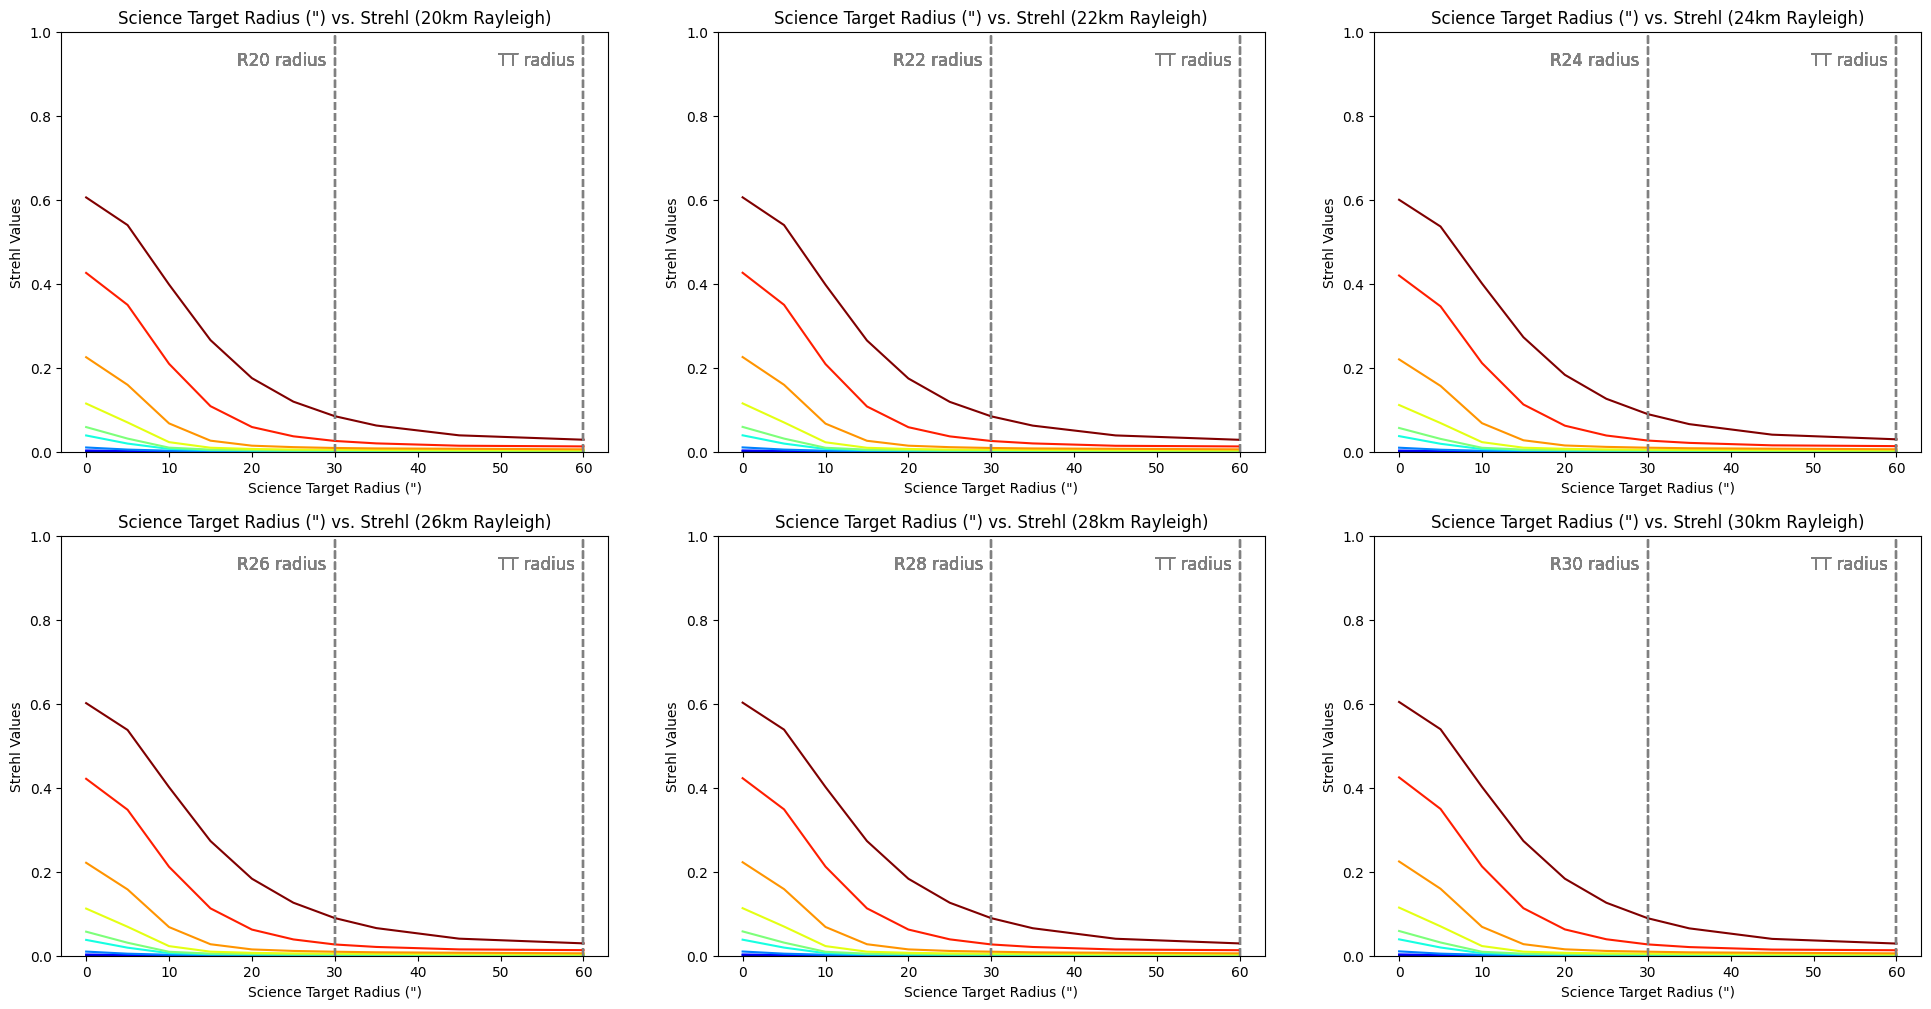

In [76]:
fig, ax = plt.subplots(2, 3, figsize = (24, 12))

for ww in range(n_wvl_20):
    label = f'{wvl_20[0, ww]*1e3:3.0f} nm'

    # 20km
    ax[0,0].plot(x_20[:, ww], strehl_20[:, ww], color=colors_20[ww])
    ax[0,0].set_title('Science Target Radius (") vs. Strehl (20km Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('Strehl Values')
    ax[0,0].set_ylim(0, 1)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(29, 0.92, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(59, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 22km
    ax[0,1].plot(x_22[:, ww], strehl_22[:, ww], color=colors_20[ww])
    ax[0,1].set_title('Science Target Radius (") vs. Strehl (22km Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('Strehl Values')
    ax[0,1].set_ylim(0, 1)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(29, 0.92, 'R22 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(59, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 24km
    ax[0,2].plot(x_24[:, ww], strehl_24[:, ww], color=colors_20[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Strehl (24km Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('Strehl Values')
    ax[0,2].set_ylim(0, 1)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(29, 0.92, 'R24 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(59, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 26km
    ax[1,0].plot(x_26[:, ww], strehl_26[:, ww], color=colors_20[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Strehl (26km Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('Strehl Values')
    ax[1,0].set_ylim(0, 1)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(29, 0.92, 'R26 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(59, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

    # 28km
    ax[1,1].plot(x_28[:, ww], strehl_28[:, ww], color=colors_20[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Strehl (28km Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('Strehl Values')
    ax[1,1].set_ylim(0, 1)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(29, 0.92, 'R28 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(59, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 30km
    ax[1,2].plot(x_30[:, ww], strehl_30[:, ww], color=colors_20[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Strehl (30km Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('Strehl Values')
    ax[1,2].set_ylim(0, 1)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(29, 0.92, 'R30 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(59, 0.92, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. FWHM (gaussian)

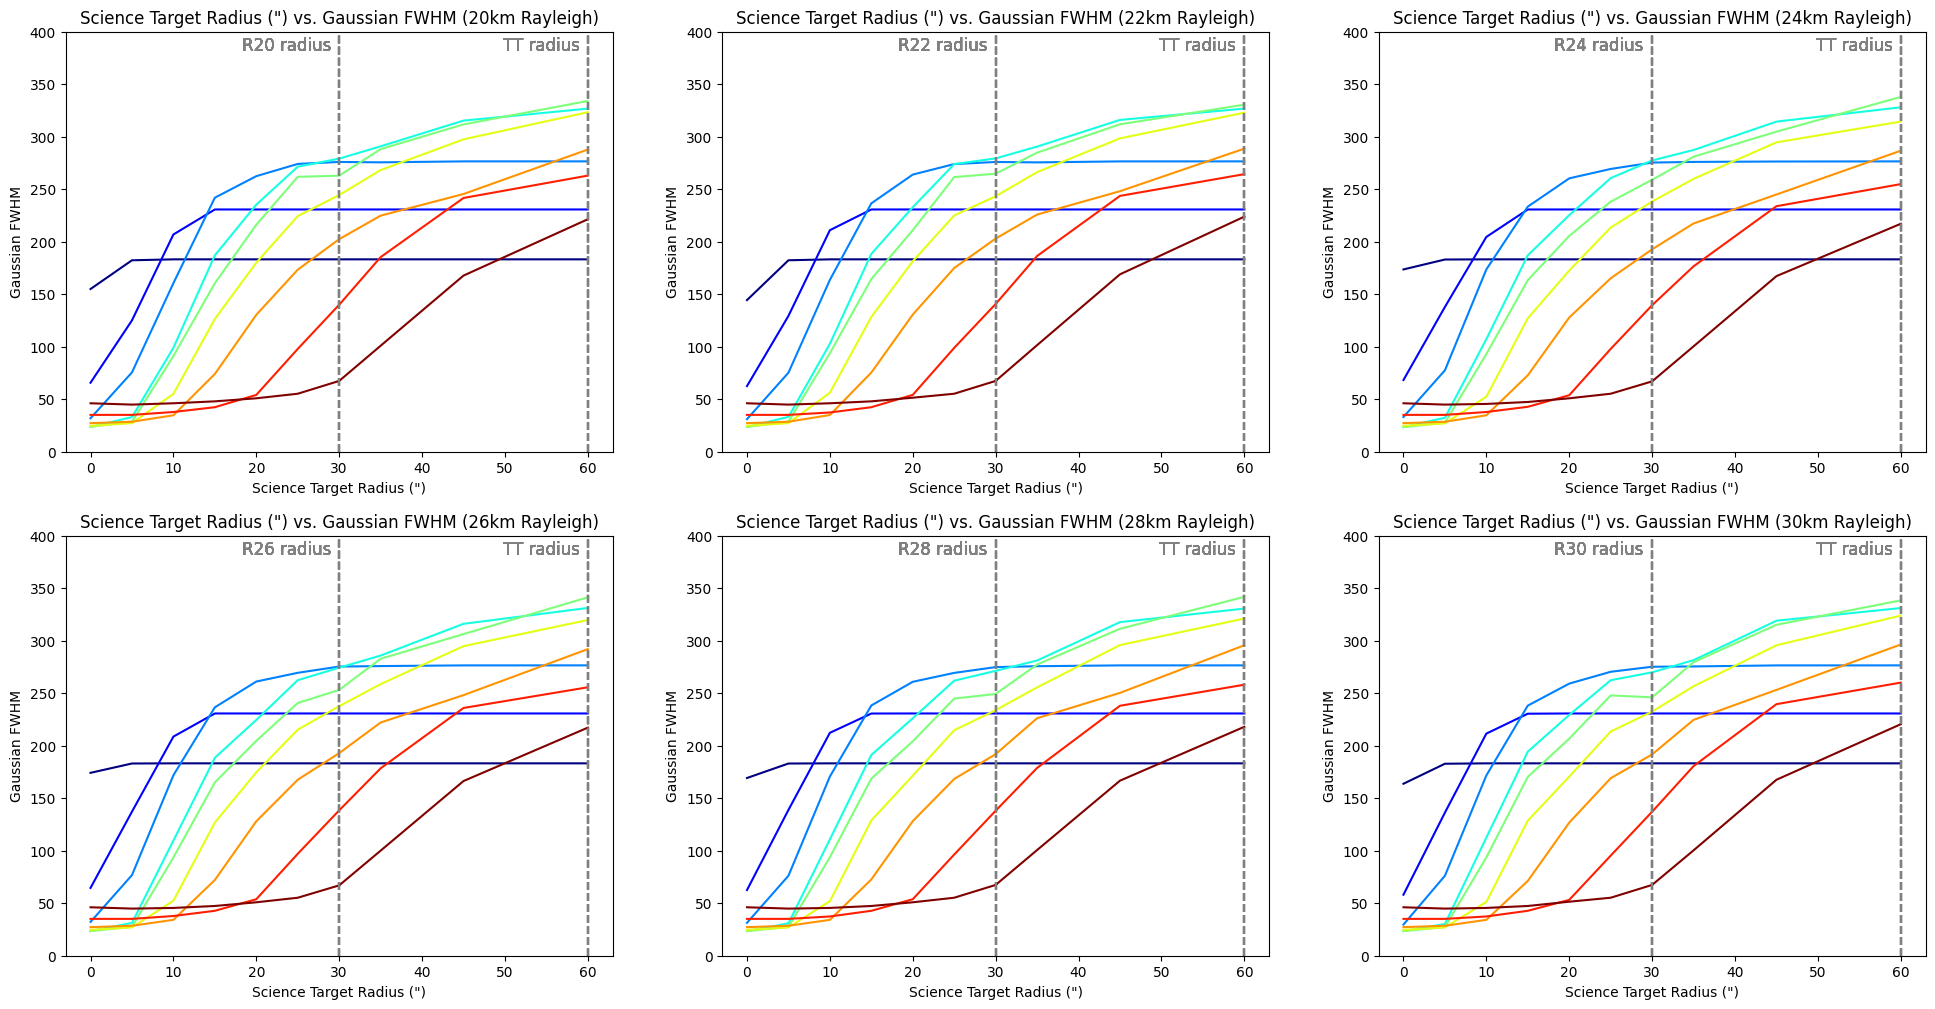

In [77]:
fig, ax = plt.subplots(2, 3, figsize = (24, 12))

for ww in range(n_wvl_20):
    label = f'{wvl_20[0, ww]*1e3:3.0f} nm'

    # 20km
    ax[0,0].plot(x_20[:, ww], fwhm_g_20[:, ww], color=colors_20[ww])
    ax[0,0].set_title('Science Target Radius (") vs. Gaussian FWHM (20km Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('Gaussian FWHM')
    ax[0,0].set_ylim(0, 400)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(29, 382, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(59, 382, 'TT radius', color='grey', ha='right', fontsize=12)

    # 22km
    ax[0,1].plot(x_22[:, ww], fwhm_g_22[:, ww], color=colors_20[ww])
    ax[0,1].set_title('Science Target Radius (") vs. Gaussian FWHM (22km Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('Gaussian FWHM')
    ax[0,1].set_ylim(0, 400)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(29, 382, 'R22 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(59, 382, 'TT radius', color='grey', ha='right', fontsize=12)

    # 24km
    ax[0,2].plot(x_24[:, ww], fwhm_g_24[:, ww], color=colors_20[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Gaussian FWHM (24km Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('Gaussian FWHM')
    ax[0,2].set_ylim(0, 400)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(29, 382, 'R24 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(59, 382, 'TT radius', color='grey', ha='right', fontsize=12)

    # 26km
    ax[1,0].plot(x_26[:, ww], fwhm_g_26[:, ww], color=colors_20[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Gaussian FWHM (26km Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('Gaussian FWHM')
    ax[1,0].set_ylim(0, 400)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(29, 382, 'R26 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(59, 382, 'TT radius', color='grey', ha='right', fontsize=12)

    # 28km
    ax[1,1].plot(x_28[:, ww], fwhm_g_28[:, ww], color=colors_20[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Gaussian FWHM (28km Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('Gaussian FWHM')
    ax[1,1].set_ylim(0, 400)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(29, 382, 'R28 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(59, 382, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 30km
    ax[1,2].plot(x_30[:, ww], fwhm_g_30[:, ww], color=colors_20[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Gaussian FWHM (30km Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('Gaussian FWHM')
    ax[1,2].set_ylim(0, 400)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(29, 382, 'R30 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(59, 382, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. FWHM (empircal)

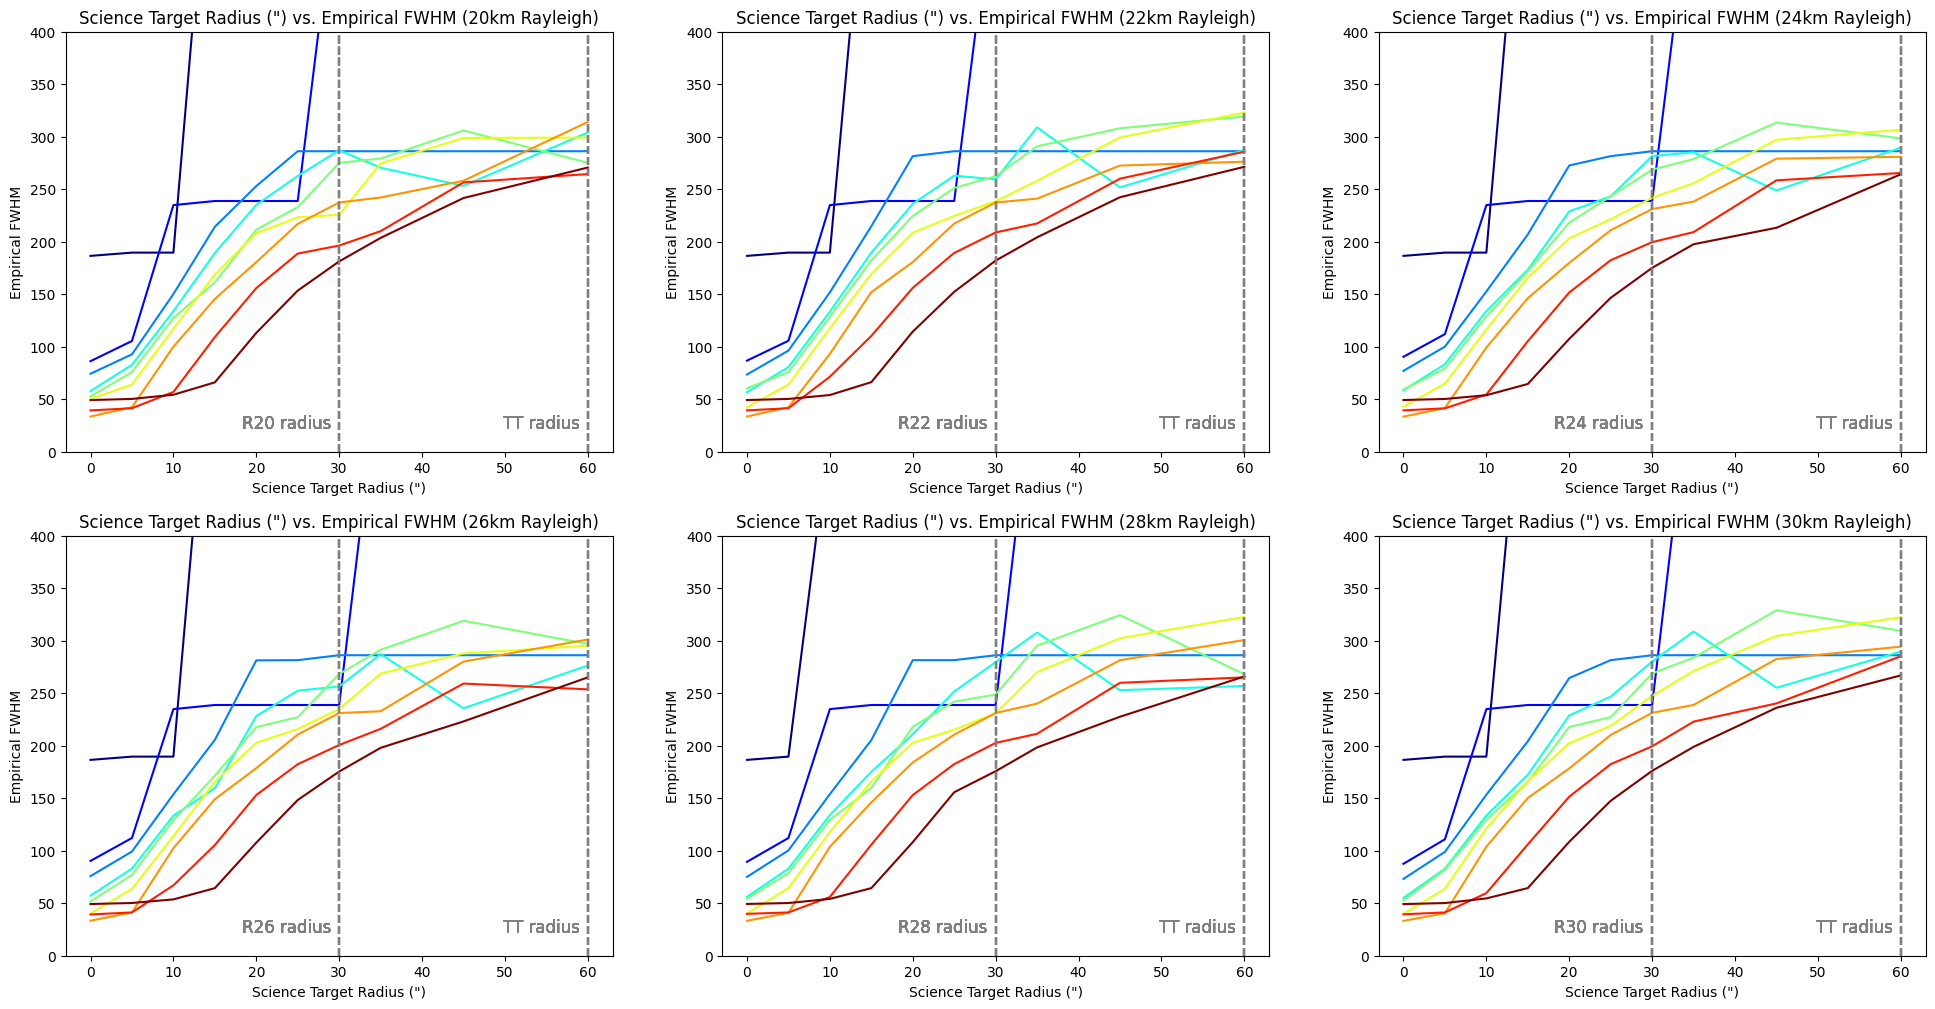

In [78]:
fig, ax = plt.subplots(2, 3, figsize = (24, 12))

for ww in range(n_wvl_20):
    label = f'{wvl_20[0, ww]*1e3:3.0f} nm'

    # 20km
    ax[0,0].plot(x_20[:, ww], fwhm_e_20[:, ww], color=colors_20[ww])
    ax[0,0].set_title('Science Target Radius (") vs. Empirical FWHM (20km Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('Empirical FWHM')
    ax[0,0].set_ylim(0, 400)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(29, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 22km
    ax[0,1].plot(x_22[:, ww], fwhm_e_22[:, ww], color=colors_20[ww])
    ax[0,1].set_title('Science Target Radius (") vs. Empirical FWHM (22km Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('Empirical FWHM')
    ax[0,1].set_ylim(0, 400)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(29, 22, 'R22 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 24km
    ax[0,2].plot(x_24[:, ww], fwhm_e_24[:, ww], color=colors_20[ww])
    ax[0,2].set_title('Science Target Radius (") vs. Empirical FWHM (24km Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('Empirical FWHM')
    ax[0,2].set_ylim(0, 400)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(29, 22, 'R24 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 26km
    ax[1,0].plot(x_26[:, ww], fwhm_e_26[:, ww], color=colors_20[ww])
    ax[1,0].set_title('Science Target Radius (") vs. Empirical FWHM (26km Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('Empirical FWHM')
    ax[1,0].set_ylim(0, 400)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(29, 22, 'R26 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 28km
    ax[1,1].plot(x_28[:, ww], fwhm_e_28[:, ww], color=colors_20[ww])
    ax[1,1].set_title('Science Target Radius (") vs. Empirical FWHM (28km Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('Empirical FWHM')
    ax[1,1].set_ylim(0, 400)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(29, 22, 'R28 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 30km
    ax[1,2].plot(x_30[:, ww], fwhm_e_30[:, ww], color=colors_20[ww])
    ax[1,2].set_title('Science Target Radius (") vs. Empirical FWHM (30km Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('Empirical FWHM')
    ax[1,2].set_ylim(0, 400)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(29, 22, 'R30 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. EE80

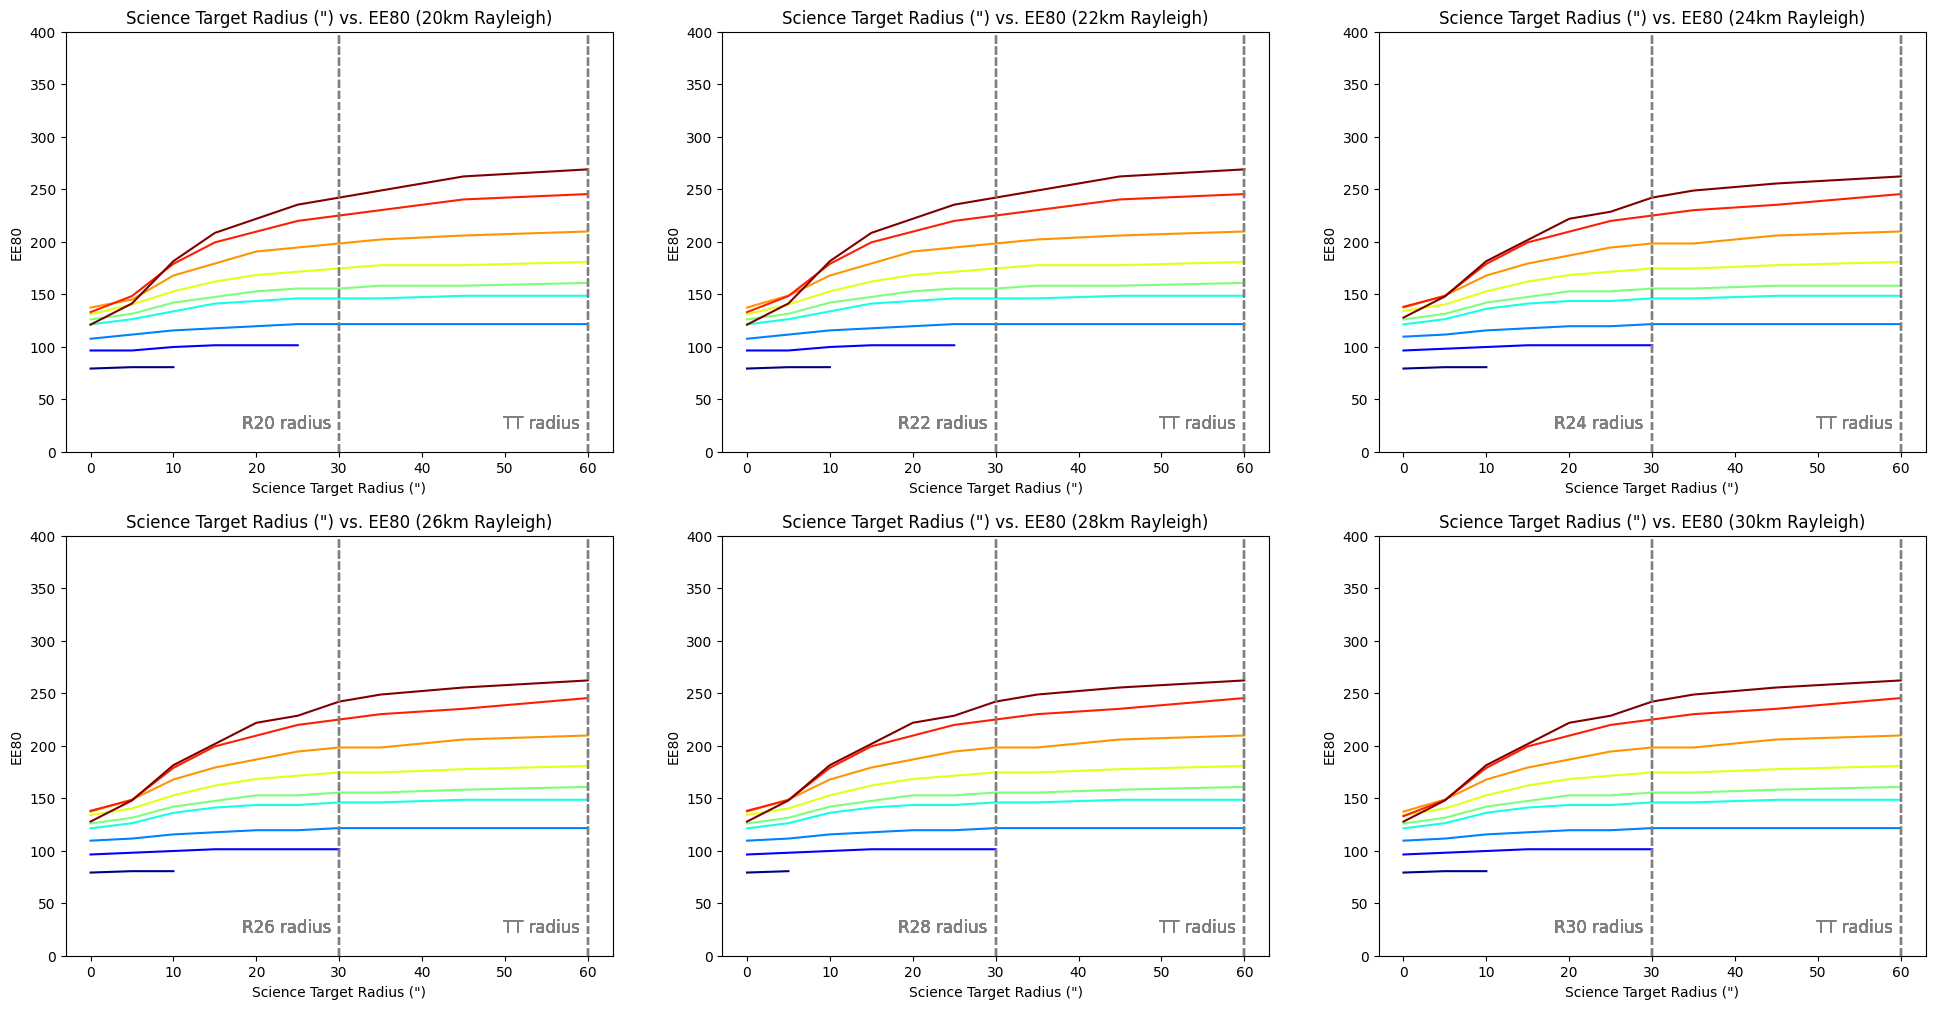

In [79]:
fig, ax = plt.subplots(2, 3, figsize = (24, 12))

for ww in range(n_wvl_20):
    label = f'{wvl_20[0, ww]*1e3:3.0f} nm'

    # 20km
    ax[0,0].plot(x_20[:, ww], r_ee80_20[:, ww], color=colors_20[ww])
    ax[0,0].set_title('Science Target Radius (") vs. EE80 (20km Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('EE80')
    ax[0,0].set_ylim(0, 400)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(29, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 22km
    ax[0,1].plot(x_22[:, ww], r_ee80_22[:, ww], color=colors_20[ww])
    ax[0,1].set_title('Science Target Radius (") vs. EE80 (22km Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('EE80')
    ax[0,1].set_ylim(0, 400)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(29, 22, 'R22 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 24km
    ax[0,2].plot(x_24[:, ww], r_ee80_24[:, ww], color=colors_20[ww])
    ax[0,2].set_title('Science Target Radius (") vs. EE80 (24km Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('EE80')
    ax[0,2].set_ylim(0, 400)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(29, 22, 'R24 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 26km
    ax[1,0].plot(x_26[:, ww], r_ee80_26[:, ww], color=colors_20[ww])
    ax[1,0].set_title('Science Target Radius (") vs. EE80 (26km Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('EE80')
    ax[1,0].set_ylim(0, 400)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(29, 22, 'R26 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 28km
    ax[1,1].plot(x_28[:, ww], r_ee80_28[:, ww], color=colors_20[ww])
    ax[1,1].set_title('Science Target Radius (") vs. EE80 (28km Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('EE80')
    ax[1,1].set_ylim(0, 400)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(29, 22, 'R28 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)
    
    # 30km
    ax[1,2].plot(x_30[:, ww], r_ee80_30[:, ww], color=colors_20[ww])
    ax[1,2].set_title('Science Target Radius (") vs. EE80 (30km Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('EE80')
    ax[1,2].set_ylim(0, 400)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(29, 22, 'R30 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. WFE

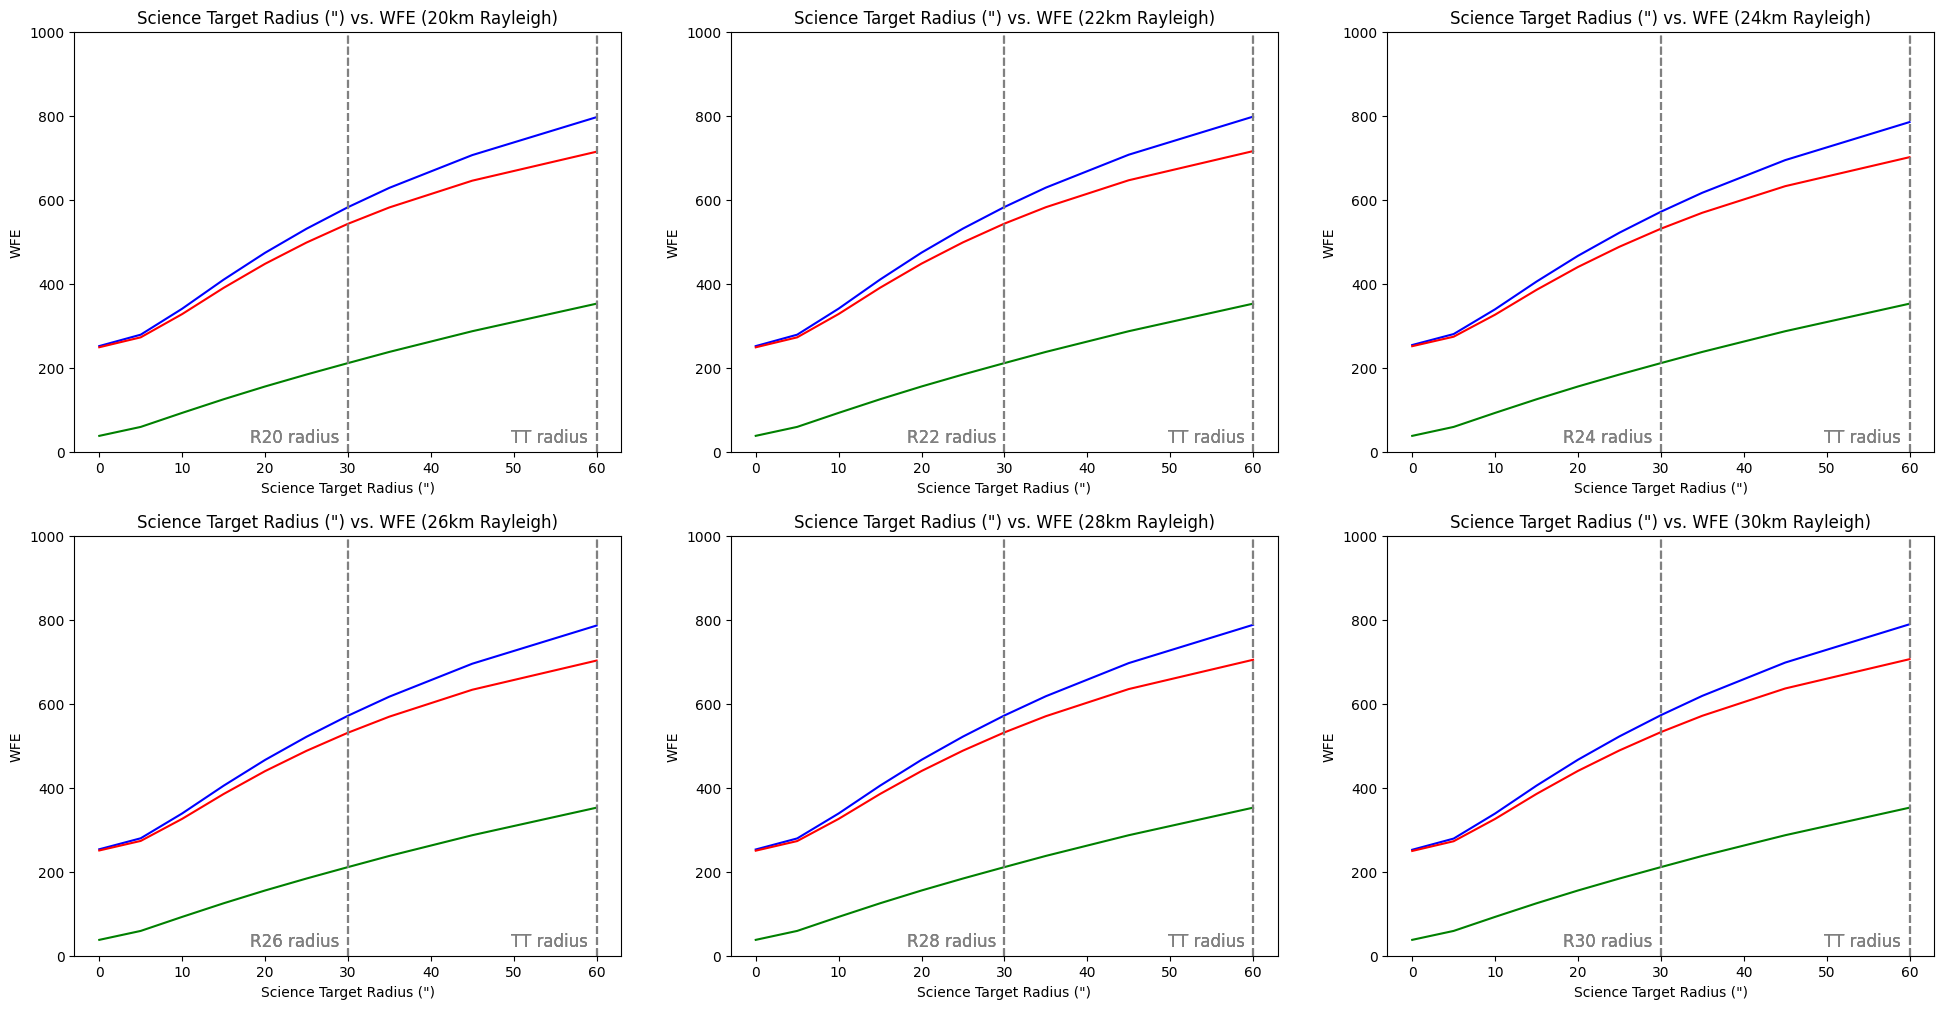

In [80]:
fig, ax = plt.subplots(2, 3, figsize = (24, 12))

#clos_xx_mean_20[0,0]

wfe_label = ["Total WFE", "Tip-Tilt", "High-Order"]
wfe_color = ["b", "g", "r"]

for i, c in enumerate(wfe_color):
    # 20km
    ax[0,0].plot(psf_x, clos_xx_mean_nm_20[:,i], color=wfe_color[i])
    ax[0,0].set_title('Science Target Radius (") vs. WFE (20km Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('WFE')
    ax[0,0].set_ylim(0, 1000)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(29, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 22km
    ax[0,1].plot(psf_x, clos_xx_mean_nm_22[:,i], color=wfe_color[i])
    ax[0,1].set_title('Science Target Radius (") vs. WFE (22km Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('WFE')
    ax[0,1].set_ylim(0, 1000)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(29, 22, 'R22 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 24km
    ax[0,2].plot(psf_x, clos_xx_mean_nm_24[:,i], color=wfe_color[i])
    ax[0,2].set_title('Science Target Radius (") vs. WFE (24km Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('WFE')
    ax[0,2].set_ylim(0, 1000)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(29, 22, 'R24 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 26km
    ax[1,0].plot(psf_x, clos_xx_mean_nm_26[:,i], color=wfe_color[i])
    ax[1,0].set_title('Science Target Radius (") vs. WFE (26km Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('WFE')
    ax[1,0].set_ylim(0, 1000)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(29, 22, 'R26 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 28km
    ax[1,1].plot(psf_x, clos_xx_mean_nm_28[:,i], color=wfe_color[i])
    ax[1,1].set_title('Science Target Radius (") vs. WFE (28km Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('WFE')
    ax[1,1].set_ylim(0, 1000)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(29, 22, 'R28 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 30km
    ax[1,2].plot(psf_x, clos_xx_mean_nm_30[:,i], color=wfe_color[i])
    ax[1,2].set_title('Science Target Radius (") vs. WFE (30km Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('WFE')
    ax[1,2].set_ylim(0, 1000)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(29, 22, 'R30 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

### Height vs. WFE (1000 step burn-in)

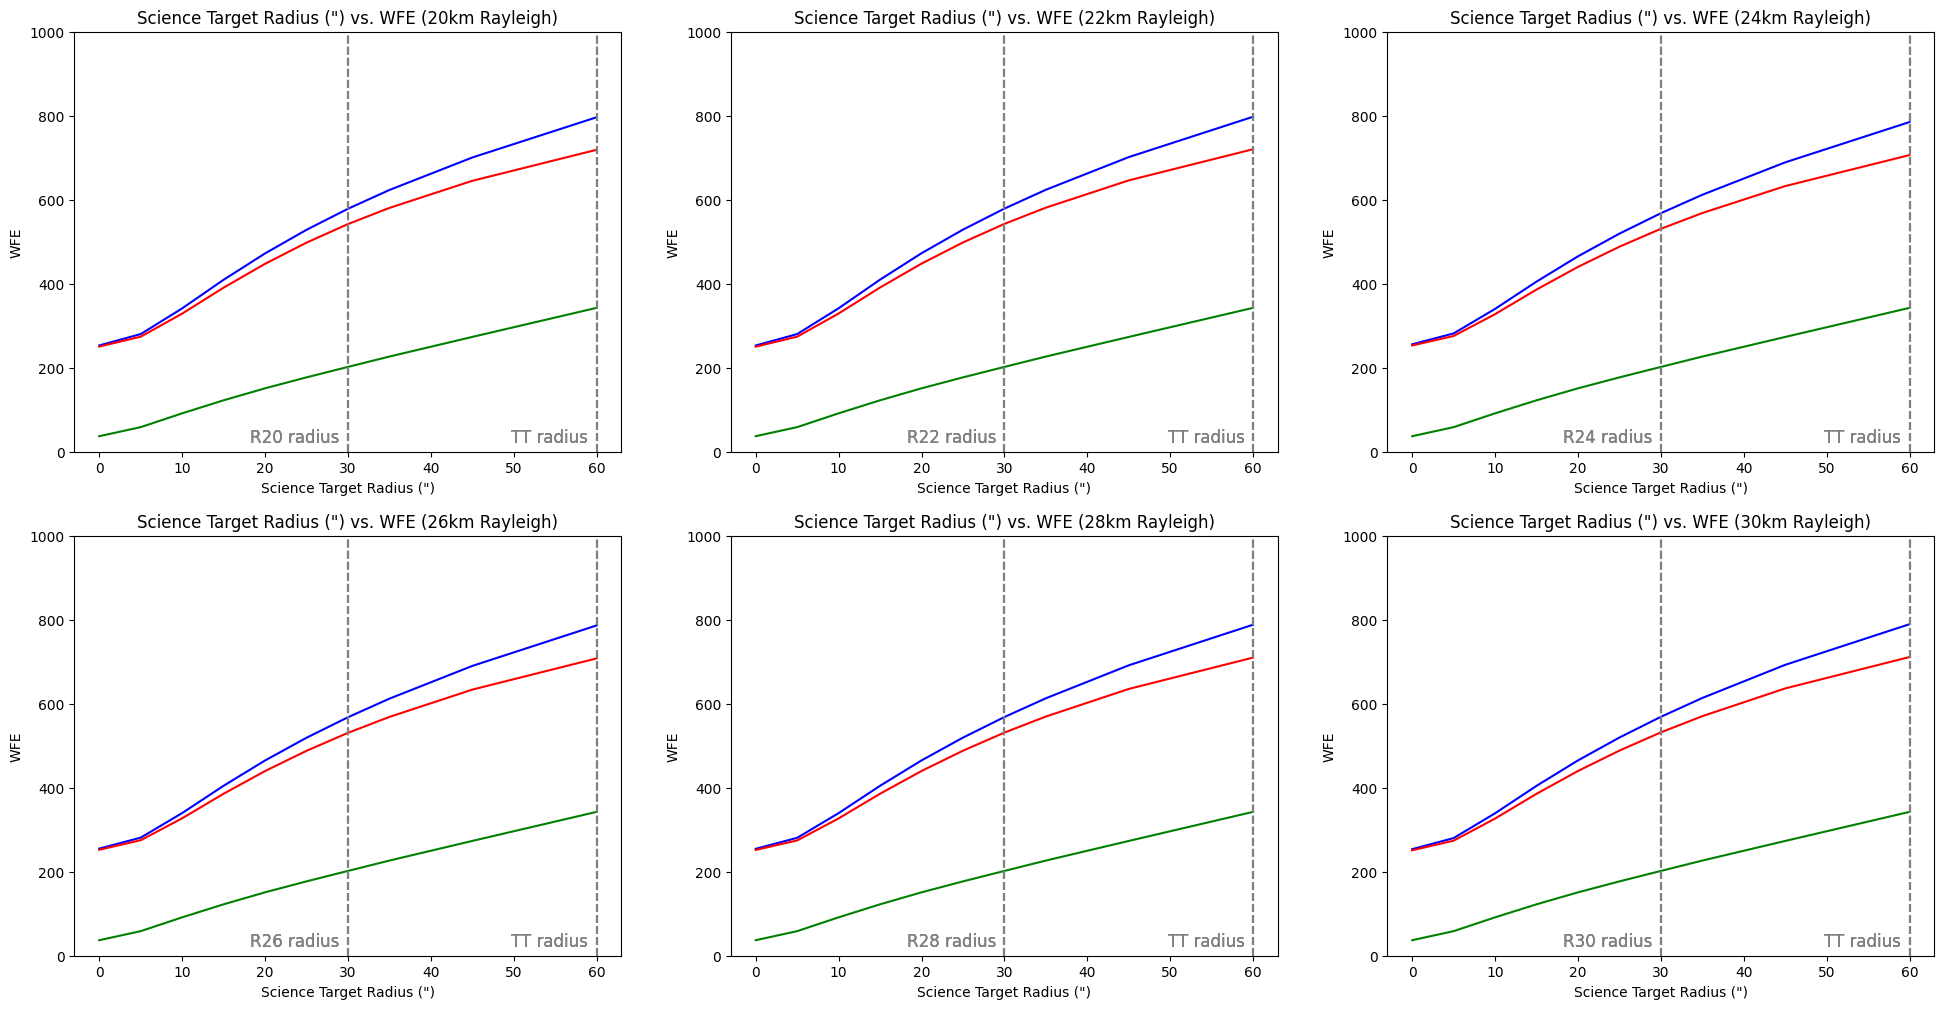

In [81]:
fig, ax = plt.subplots(2, 3, figsize = (24, 12))

#clos_xx_mean_20[0,0]

wfe_label = ["Total WFE", "Tip-Tilt", "High-Order"]
wfe_color = ["b", "g", "r"]

for i, c in enumerate(wfe_color):
    # 20km
    ax[0,0].plot(psf_x, burn_clos_xx_mean_nm_20[:,i], color=wfe_color[i])
    ax[0,0].set_title('Science Target Radius (") vs. WFE (20km Rayleigh)')
    ax[0,0].set_xlabel('Science Target Radius (")')
    ax[0,0].set_ylabel('WFE')
    ax[0,0].set_ylim(0, 1000)
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].axvline(60, linestyle='--', color='grey')
    ax[0,0].text(29, 22, 'R20 radius', color='grey', ha='right', fontsize=12)
    ax[0,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 22km
    ax[0,1].plot(psf_x, burn_clos_xx_mean_nm_22[:,i], color=wfe_color[i])
    ax[0,1].set_title('Science Target Radius (") vs. WFE (22km Rayleigh)')
    ax[0,1].set_xlabel('Science Target Radius (")')
    ax[0,1].set_ylabel('WFE')
    ax[0,1].set_ylim(0, 1000)
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].axvline(60, linestyle='--', color='grey')
    ax[0,1].text(29, 22, 'R22 radius', color='grey', ha='right', fontsize=12)
    ax[0,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 24km
    ax[0,2].plot(psf_x, burn_clos_xx_mean_nm_24[:,i], color=wfe_color[i])
    ax[0,2].set_title('Science Target Radius (") vs. WFE (24km Rayleigh)')
    ax[0,2].set_xlabel('Science Target Radius (")')
    ax[0,2].set_ylabel('WFE')
    ax[0,2].set_ylim(0, 1000)
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].axvline(60, linestyle='--', color='grey')
    ax[0,2].text(29, 22, 'R24 radius', color='grey', ha='right', fontsize=12)
    ax[0,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 26km
    ax[1,0].plot(psf_x, burn_clos_xx_mean_nm_26[:,i], color=wfe_color[i])
    ax[1,0].set_title('Science Target Radius (") vs. WFE (26km Rayleigh)')
    ax[1,0].set_xlabel('Science Target Radius (")')
    ax[1,0].set_ylabel('WFE')
    ax[1,0].set_ylim(0, 1000)
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].axvline(60, linestyle='--', color='grey')
    ax[1,0].text(29, 22, 'R26 radius', color='grey', ha='right', fontsize=12)
    ax[1,0].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 28km
    ax[1,1].plot(psf_x, burn_clos_xx_mean_nm_28[:,i], color=wfe_color[i])
    ax[1,1].set_title('Science Target Radius (") vs. WFE (28km Rayleigh)')
    ax[1,1].set_xlabel('Science Target Radius (")')
    ax[1,1].set_ylabel('WFE')
    ax[1,1].set_ylim(0, 1000)
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].axvline(60, linestyle='--', color='grey')
    ax[1,1].text(29, 22, 'R28 radius', color='grey', ha='right', fontsize=12)
    ax[1,1].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

    # 30km
    ax[1,2].plot(psf_x, burn_clos_xx_mean_nm_30[:,i], color=wfe_color[i])
    ax[1,2].set_title('Science Target Radius (") vs. WFE (30km Rayleigh)')
    ax[1,2].set_xlabel('Science Target Radius (")')
    ax[1,2].set_ylabel('WFE')
    ax[1,2].set_ylim(0, 1000)
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].axvline(60, linestyle='--', color='grey')
    ax[1,2].text(29, 22, 'R30 radius', color='grey', ha='right', fontsize=12)
    ax[1,2].text(59, 22, 'TT radius', color='grey', ha='right', fontsize=12)

### PSF vs. Radius

In [45]:
os.chdir("20km")

In [33]:
filelist = os.listdir('./')
fits_files = fnmatch.filter(filelist,'evlpsfcl_1_x*_y*.fits')

with fits.open(fits_files[0]) as psf_all_wvls:
    all_waves = [psf_all_wvls[pp].header['wvl'] * 1e9 for pp in range(len(psf_all_wvls))]

In [34]:
bandpass = 8

In [35]:
from paarti.psf_metrics import metrics

class PSF_stack(object):
    def __init__(self, psfs, pos, pixel_scale, wavelength,
                 bandpass, telescope, isgrid=False):
        """
        psfs : numpy array
            a 3D stack of PSFs with dimensions [N_psfs, psf_Y_size, psf_X_size]
        pos : numpy array
            a 2D array with the (y, x) sky positions for each PSF.
            Shape is (N_psfs, 2).
        pixel_scale : float
            The pixel scale of each PSF in arcsec / pixel.
        wavelength : float
            The central wavelength of the PSFs in nm.
        bandpass : float
            The wavelength range or bandpass of the PSFs in nm.
        telescope : string
            The name of the telescope. Ideally, it would be one from the
            dictionary in paarti.telescopes.tel_names (e.g. 'Keck1').
        """
        # 3D array with dimensions of [number of PSFs, psf_Y, psf_X]
        self.psfs = psfs

        # Give the sky positions (grid_Y, grid_X) of each PSF in the stack
        self.pos = pos

        self.pixel_scale = pixel_scale
        self.wavelength = wavelength
        self.bandpass = bandpass
        self.telescope = telescope
        
        return

    def save(self):
        return


class MAOS_PSF_stack(PSF_stack):
    def __init__(self, directory = './', bandpass=0, telescope='KECK1',
                 isgrid=True,
                 LGSpos=np.array([[-7.6,0],[0,7.6],[0,-7.6],[7.6,0]]),
                 NGSpos=np.array([[0,5.6]]) ):
        """
        directory : string
            A directory containing the MAOS output FITS files.
        LGSpos : numpy array
            An n by 2 array containing the x,y locations of each LGS
        NGSpos : numpy array
            An n by 2 array containing the x,y locations of each NGS
        """
        filelist = os.listdir(directory)
        fits_files = fnmatch.filter(filelist,'evlpsfcl_1_x*_y*.fits')
        n_psfs = len(fits_files)
        pos = np.empty([n_psfs, 2])

        first_file = True
        
        for i, FITSfilename in enumerate(fits_files):
            with fits.open(directory + FITSfilename) as psfFITS:
                header = psfFITS[bandpass].header
                data = psfFITS[bandpass].data          
                # shape is (y,x). Fastest changing axis (x) is printed last
                
            # When reading the first FITS file, initialise the arrays
            # and read some parameters.                
            if first_file:                                              
                psf_x_size = data.shape[1]
                psf_y_size = data.shape[0]
                psfs = np.empty([n_psfs, psf_y_size, psf_x_size])
                pixel_scale = header['dp']
                wavelength = header['wvl']*1E9                         
                first_file = False

            psfs[i,:,:] = data
            pos[i,0] = header['theta'].imag
            pos[i,1] = header['theta'].real


        super().__init__(psfs, pos, pixel_scale, wavelength,
                         bandpass, telescope, isgrid)

        # Other MAOS specific stuff.
        self.NGSpos = NGSpos
        self.LGSpos = LGSpos
        
        return

psf_stack = MAOS_PSF_stack(directory='./', isgrid=True, bandpass=bandpass)

In [38]:
#zoom = 60 # arcsec for side of PSF box

0.0
128.0


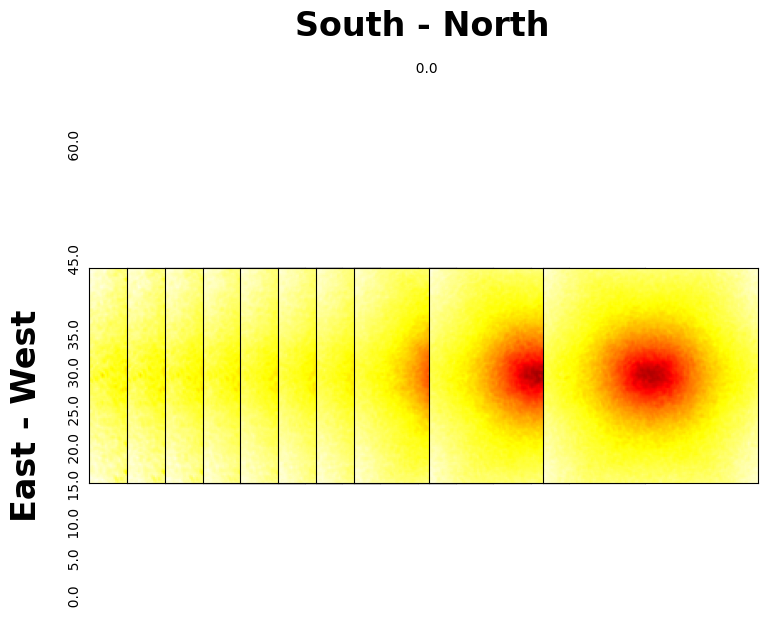

In [46]:
from matplotlib import colors

def plot_psf_stack(psf_stack, zoom=None,
                   scale='log', color='range', linthresh=1e-4):
    """
    psf: psfs.PSF_stack
        PSF grid

    Optional Inputs:
    ----------------
    side: int or None
        Number of PSFs to show on each side of the grid (less than
        or equal to sqrt(n)). The first and last PSF of each column is
        always plotted. If 'None', all PSFs are shown.
    zoom: float or None
        Size of PSF box, in arcsec. If 'None', the full PSF is shown.
    scale: str
        Color scale. 'linear' for linear, 'log' for logarithmic
    color: str
        Color coverage ('range' for the full range of values,
        'zero' for symmetric around 0). The first is useful to show a grid
        of PSFs, the second to show the difference of PSFs.
    linthresh: float
        Threshold to color PSF values as zero if a symmetric
        logarithmic scale is used.
    """

    # Prepare grid
    n = psf_stack.psfs.shape[0]
    pos = psf_stack.pos

    zoom_px = round(psf_stack.psfs.shape[1] / 2)
    if ((zoom is not None) and
        ((zoom / psf_stack.pixel_scale) < zoom_px)):
        zoom_px = np.ceil(zoom / psf_stack.pixel_scale)

    zoom_px_min = (psf_stack.psfs.shape[1] / 2) - zoom_px
    zoom_px_max = (psf_stack.psfs.shape[1] / 2) + zoom_px
    print(zoom_px_min)
    print(zoom_px_max)

    # Calculate color range
    psf_color = psf_stack.psfs[:,
                               int(zoom_px_min): int(zoom_px_max),
                               int(zoom_px_min): int(zoom_px_max)]

    if color == 'range':
        cmap_name = 'hot_r'
        psf_color_min = np.min(psf_color)
        psf_color_max = np.max(psf_color)

        if scale == 'log':
            norm = colors.LogNorm(vmin=psf_color_min, vmax=psf_color_max)
        else:
            norm = colors.Normalize(vmin=psf_color_min, vmax=psf_color_max)
    else:
        cmap_name = 'seismic_r'
        psf_color_max = np.max(np.abs(psf_color))
        psf_color_min = -psf_color_max

        if scale == 'log':
            norm = colors.SymLogNorm(linthresh=linthresh, vmin=psf_color_min,
                                     vmax=psf_color_max)
        else:
            norm = colors.Normalize(vmin=psf_color_min, vmax=psf_color_max)

            
    # Figure out how big we should make each PSF.
    # We will simply use the sqrt of the number of PSFs to
    # approximate. This works well for a square grid. 
    n_psfs_side = int(n**0.5)

    # Setup the boundaries of the PSF boxes (leave room for axis labels).
    plot_box_size = 0.85
    xlo = 0.1
    xhi = xlo + plot_box_size
    ylo = 0.05
    yhi = ylo + plot_box_size

    box_scale = 0.95
    psf_axes_size = (plot_box_size / n_psfs_side) * box_scale
    psf_box_size = n_psfs_side * psf_axes_size # does not include padding
    scale_param = n_psfs_side / (n_psfs_side + 2)

    # Figure out the max and min positions on the sky to
    # fit in all the PSFs.
    xpos_rng = pos[:, 0].max() - pos[:, 0].min()
    ypos_rng = pos[:, 1].max() - pos[:, 1].min()
    xpos_cen = pos[:, 0].mean()
    ypos_cen = pos[:, 1].mean()
    pos_rng = np.max([xpos_rng, ypos_rng])
    pos_box_size = pos_rng * plot_box_size * box_scale / ((n_psfs_side - 1) * psf_axes_size)

    # Convert positions into figure coordinates. These will mark
    # the center of the PSF boxes.
    xpos_min = xpos_cen - 0.5*pos_box_size
    ypos_min = ypos_cen - 0.5*pos_box_size
    
    xpos_min_fig = xpos_min * (plot_box_size / pos_box_size)
    xpos_min_fig += xlo
    ypos_min_fig = ypos_min * (plot_box_size / pos_box_size)
    ypos_min_fig += ylo

    xpos_fig = (pos[:, 0] - xpos_min) * plot_box_size / pos_box_size
    xpos_fig += xlo
    ypos_fig = (pos[:, 1] - ypos_min) * plot_box_size / pos_box_size
    ypos_fig += ylo
    
    # Plot
    fig = plt.figure(1, figsize=(8, 8))
    plt.clf()

    for pp in range(len(pos)):
        yfig = xpos_fig[pp]
        xfig = ypos_fig[pp]

        # Need to figure out the lower left corner (rather than center)
        # of this box. 
        xfig_min = xfig - 0.5 * psf_axes_size
        yfig_min = yfig - 0.5 * psf_axes_size
        
        ax = fig.add_axes([xfig_min, yfig_min, psf_axes_size, psf_axes_size])
        ax.imshow(psf_stack.psfs[pp, :, :], norm=norm,
                       cmap=plt.get_cmap(cmap_name), aspect='equal',
                       origin='lower')

        ax.set_xlim([zoom_px_min, zoom_px_max])
        ax.set_ylim([zoom_px_min, zoom_px_max])
        ax.tick_params(axis='x', bottom=False, labelbottom=False)
        ax.tick_params(axis='y', left=False, labelleft=False)            

    # Make the axis labels.
    lab_x = np.unique(pos[:, 0])
    lab_y = np.unique(pos[:, 1])
    lab_x_fig = (lab_x - xpos_min) * plot_box_size / pos_box_size
    lab_x_fig += xlo
    lab_y_fig = (lab_y - ypos_min) * plot_box_size / pos_box_size
    lab_y_fig += ylo

    for xx in range(len(lab_x)):
        fig.text(lab_x_fig[xx], yhi, f'{lab_x[xx]:5.1f}',
                 ha='center', va='bottom')
    for yy in range(len(lab_y)):
        fig.text(xlo, lab_y_fig[yy], f'{lab_y[yy]:5.1f}',
                 ha='right', va='center', rotation='vertical')

    fig.text(xlo + 0.5 * plot_box_size, 0.95, 'South - North',
             ha='center',
             weight='bold', fontsize=24)
    fig.text(0.01, ylo + 0.5 * plot_box_size, 'East - West',
             va='center', rotation='vertical',
             weight='bold', fontsize=24)

        
    plt.show(block=False)

    return

plot_psf_stack(psf_stack, zoom=zoom)

In [ ]:
def load_maos_psf_stack(directory = './', bandpass=8):
    # FITS  = flexible image transfer system 
    filelist = os.listdir(directory) # Grab all files from current directory 
    fits_files = fnmatch.filter(filelist, 'evlpsfcl_1_x*_y*.fits') # Only grab PSF fits files
    n_psf_fits_files = len(fits_files) # Counts how many PSF fits files

    for i, FITSfilename in enumerate(fits_files): # Iterate over PSF fits files
        with fits.open(directory + FITSfilename) as psfFITS: # Enter PSF fits files
            header = psfFITS[bandpass].header # Grab header info from PSF fit file
            data = psfFITS[bandpass].data # Grab data info from PSF fit fie

            psf_x_size = data.shape[1] # 1 is width, so x-values 
            psf_y_size = data.shape[0] # 0 is height, so y-values
            pixel_scale = header['dp'] # Retrieves pixel scale from header
            wavelength = header['wvl']*1e9 # Retrieves wavelength (in nanometers) from header (bandpass)

            psfs = np.empty([n_psf_fits_files, psf_x_size, psf_y_size]) # Creates empty 2D array to store 
            pos = np.empty([n_psf_fits_files, 2]) # Creates empty 2D array to store (x,y) of PSFs, arbitrary fill
            
            psfs[i, :, :] = data # Fills 2D "psfs" array with (x,y) information from each PSF
            pos[i, 0] = header['theta'].imag 
            pos[i, 1] = header['theta'].real

            psf_width_arc = psf_x_size * pixel_scale # How many arcseconds across one PSF is
            psf_height_arc = psf_y_size * pixel_scale
            
    return psfs, pos, pixel_scale, wavelength, bandpass

In [ ]:
maos_psf_stack = load_maos_psf_stack()
psfs, pos, pixel_scale, wavelength, bandpass = maos_psf_stack

In [ ]:
def plot_psf_stack(psfs, pos, pixel_scale, zoom=None, scale='log', color='range', linthresh=1e-4):
    n = psfs.shape[0] # Counts how many PSF fits files there are 
    zoom_px = round(psfs.shape[1]/2) # Sets zoom-out limit
    if zoom is not None and (zoom/pixel_scale) < zoom_px: 
        zoom_px = np.ceil(zoom / pixel_scale) 
    else:
        print("Improper zoom (arcseconds). Setting zoom to:", zoom_px*pixel_scale)

    zoom_px_min = (psfs.shape[1] / 2) - zoom_px # Min zoom
    zoom_px_max = (psfs.shape[1] / 2) + zoom_px # Max zoom

    psf_color = psfs[:, int(zoom_px_min): int(zoom_px_max), int(zoom_px_min): int(zoom_px_max)]  

    if color == 'range':
        cmap_color = 'hot_r'
        psf_color_min = np.min(psf_color)
        psf_color_max = np.max(psf_color)

        if scale == 'log':
            norm = colors.LogNorm(vmin=psf_color_min, vmax=psf_color_max)
        else: 
            norm = colors.Normalize(vmin=psf_color_min, vmax=psf_color_max)

    n_psfs_side = int(n*0.5) # For making a grid of PSFs
    plot_box_size = 0.85
    xlo = 0.1
    xhi = xlo + plot_box_size
    ylo = 0.05
    yhi = ylo + plot_box_size

    box_scale = 0.95
    psf_axes_size = (plot_box_size / n_psfs_side) * box_scale
    psf_box_size = n_psfs_side * psf_axes_size
    scale_param = n_psfs_side / (n_psfs_side + 2)

    xpos_rng = pos[:,0]

    print(scale_param)

In [ ]:
plot_psf_stack(psfs=psfs, pos=pos, pixel_scale=pixel_scale)

In [ ]:
def main(output_file, master_file, radius):
    thetax = []
    thetay = []
    
    for r in radius: 
        thetax.append([r, 0 -r, 0])
        thetay.append([0, r, 0, -r])

    for r, x, y in zip(radius, thetax, thetay):
        x_coors = ' '.join(map(str, x))
        y_coors = ' '.join(map(str, y))
        
        command = f"maos -o {output_file}/{r}as -c {master_file} plot.all=1 plot.setup=1 -O powfs.nwfs=[1 4 3 1] wfs.thetax=[0 {x_coors} 5 -2.5 -2.5 0] wfs.thetay=[0 {y_coors} 4.33 -4.33 0] powfs1_llt.ox = [1 0 -1 0]*6.5 powfs1_llt.oy=[0 1 0 -1]*6.5"
        print(command)

In [ ]:
main(output_file="test", master_file="A_test.conf", radius=[5, 15, 25, 35, 45, 60])